# Set up environment

## Miniconda, biopython, openMM, pdbfixer

### install miniconda for Colab

ref: https://towardsdatascience.com/conda-google-colab-*75f7c867a522
- current python version: 3.6.9
- most recent compatible miniconda verison: 4.5.4

In [1]:
!which python
!python --version
!echo $PYTHONPATH

#remove python path to avoid conda warnings
%env PYTHONPATH=

/usr/local/bin/python
Python 3.7.10
/env/python
env: PYTHONPATH=


In [2]:
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget -nc https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670df_0 ...
installing: tk-8.6.7-hc745277_3 ...
installing: xz-5.2.4-h14c3975_4 ...
installing: yaml-0.1.7-had09818_2 ...
installing: zlib-1.2.11-ha838bed_2 ...
installing: libedit-3.1.20170329-h6b74fdf_2 ...
installing: readline-7.0-ha6073c6_4 ...
installing: sqlite-3.23.1-he433501_0 ...
installing: asn1crypto-0.24.0-py36_0 ...
installing: certifi-2018.4.16-py36_0 ...
installing: chardet-3.0.4-py36h0f667ec_1 ...
installing: idna-2.6-py36h82fb2a8_1 ...
installing: pycosat-0.6.3-py36h0a5515d_0 ...
installing: pycparser-2.18-py36hf9f622e_1 ...
installing: pysocks-1.6.8-py36_0 ...
installing: ruamel_yaml-0.15.37-py36h14c3975_2 ...
installing: six-1.11

--2021-06-14 16:29:21--  https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh [following]
--2021-06-14 16:29:21--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh’

     0K .......... .......... .......... .......... ..........  0% 20.5M 3s
    50K .......... .......... .......... .......... ..........  0%

Check for correct installation:

In [3]:
# should return /usr/local/bin/conda
!which conda

# should return 4.5.4
!conda --version

#Miniconda actually installed a slightly different version of Python
!python --version

/usr/local/bin/conda
conda 4.5.4
Python 3.6.5 :: Anaconda, Inc.


### Update conda

...and all its dependencies to their most recent versions without updating Python to 3.7 (or 3.8), i.e. holding the Python version at 3.6.

Since miniconda has a new version (4.10) that prevents me from importing simtk, I have to ensure it only uses 4.9.2 version (the one this notebook was originally running with) and avoid automatic updates.

In [4]:
!conda install conda=4.9.2  --yes

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - 

In [5]:
!conda --version

conda 4.9.2


In [6]:
!pip install tqdm

In [7]:
%%bash
conda install --channel defaults conda=4.9.2 python=3.6 --yes
conda update --channel defaults conda=4.9.2 --all --yes

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - conda=4.9.2
    - python=3.6


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotlipy-0.7.0             |py36h27cfd23_1003         320 KB
    certifi-2021.5.30          |   py36h06a4308_0         139 KB
    cffi-1.14.0                |   py36h2e261b9_0         223 KB
    chardet-4.0.0              |py36h06a4308_1003         199 KB
    conda-4.9.2                |   py36h06a4308_0         2.9 MB
    conda-package-handling-1.7.3|   py36h27cfd23_1         882 KB
    cryptography-2.3.1         |   py36hc365091_0         514 KB
    pip-21.1.2      



==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda




==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda




Check for correct update:

In [8]:
# now returns 4.9.2
!conda --version

# now returns Python 3.6.13 :: Anaconda, Inc.
!python --version 

conda 4.9.2
Python 3.6.13 :: Anaconda, Inc.


Any package that you install with Conda will be installed into the directory /usr/local/lib/python3.6/site-packages so you will need to add this directory to sys.path in order for these packages to be available for import.

Since the preinstalled packages included with Google Colab are installed into the /usr/local/lib/python3.6/dist-packages directory, which appears ahead, the version of a package available via Google Colab will take precedence over any version of the same package installed via Conda.

In [9]:
import sys
_ = (sys.path
        .append("/usr/local/lib/python3.6/site-packages"))

Install packages if necessary. include the --yes flag when installing your packages to avoid getting prompted to confirm the package plan.

In [10]:
# !conda install --channel conda-forge featuretools --yes

### Install bioptyhon, openMM, pdbfixer, neptune-client

In [11]:
!pip install biopython==1.78
!pip install tensorflow==1.15
!conda install -c omnia openmm=7.3.1 pdbfixer=1.5 -y
# !conda install -c omnia pdbfixer=1.5 -y

     |████████████████████████████████| 2.3 MB 4.1 MB/s 
     |████████████████████████████████| 14.8 MB 274 kB/s 


     |████████████████████████████████| 412.3 MB 30 kB/s 
     |████████████████████████████████| 129 kB 48.1 MB/s 
     |████████████████████████████████| 1.0 MB 55.3 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 503 kB 58.2 MB/s 
     |████████████████████████████████| 57 kB 5.5 MB/s 
     |████████████████████████████████| 65 kB 4.4 MB/s 
     |████████████████████████████████| 4.2 MB 38.1 MB/s 
     |████████████████████████████████| 3.8 MB 52.2 MB/s 
     |████████████████████████████████| 50 kB 7.6 MB/s 
     |████████████████████████████████| 4.0 MB 26.6 MB/s 
     |████████████████████████████████| 97 kB 5.6 MB/s 
     |████████████████████████████████| 288 kB 66.7 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7538 sha256=c32066d0182db586957bd3140808444a895c98814d64006a1e739c574c186e90
  Stored in directory: /root/.cache/pip/wheels/19/a7/b9/0740c7a3a7d1d348f04823339274b90de25fbcd217b2ee1fbe
  Cr

Solving environment: \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - openmm=7.3.1
    - pdbfixer=1.5


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |         openblas          46 KB
    conda-4.10.1               |   py36h06a4308_1         2.9 MB
    fftw3f-3.3.4               |                2         1.2 MB  omnia
    libgfortran-ng-7.5.0       |      ha8ba4b0_17          22 KB
    libgfortran4-7.5.0         |      ha8ba4b0_17         995 KB
    libopenblas-0.3.13         |       h4367d64_0         4.8 MB
    numpy-1.17.0               |   py36h99e49ec_0          24 KB
    numpy-base-1.17.0          |   py36h2f8d375_0         5.2 MB
    openmm-7.3.1               | py36_cuda92_rc_2        11.4 MB  omnia
    pdbfixer-1.5               |           py36_0         188 KB  omnia
    -----------------

**Ensure openmm and pdbfixer .so (shared library) are called with proper name: (to run if there is a loading problem with these two packages)**

In [12]:
!cp /usr/local/lib/python3.6/site-packages/simtk/openmm/_openmm.cpython-36m-x86_64-linux-gnu.so /usr/local/lib/python3.6/site-packages/simtk/openmm/_openmm.so
!ls /usr/local/lib/python3.6/site-packages/simtk/openmm/

amd.py	     mtsintegrator.py			      _openmm.so   version.py
app	     _openmm.cpython-36m-x86_64-linux-gnu.so  __pycache__
__init__.py  openmm.py				      vec3.py


In [13]:
!cp /usr/local/lib/python3.6/site-packages/Bio/Align/_aligners.cpython-36m-x86_64-linux-gnu.so /usr/local/lib/python3.6/site-packages/Bio/Align/_aligners.so
!ls /usr/local/lib/python3.6/site-packages/Bio/Align

_aligners.c				   AlignInfo.py  __pycache__
_aligners.cpython-36m-x86_64-linux-gnu.so  Applications  substitution_matrices
_aligners.so				   __init__.py


Ensure 3.6.13 version

In [14]:
py_version = !python -V
assert py_version[0].split(" ::")[0].split("Python ")[1] == "3.6.13"

For using Bio.PDB.skdtrees module (C script), one needs to first compile it (to i.e. translate to machine code), precising which python header file (used by GCC to build applications) with -I flag. -fPIC for "Position Independent Code", which means that the generated machine code is not dependent on being located at a specific address in order to work (e.g. C jumps would be generated as relative rather than absolute).

Once compiled, create a shared library file (".so" extension).

In [15]:
!gcc -I /usr/include/python3.6m/ -c -Wall -fPIC -o /usr/local/lib/python3.6/site-packages/Bio/PDB/kdtrees.o /usr/local/lib/python3.6/site-packages/Bio/PDB/kdtrees.c
!gcc -o /usr/local/lib/python3.6/site-packages/Bio/PDB/kdtrees.so -shared /usr/local/lib/python3.6/site-packages/Bio/PDB/kdtrees.o

In [16]:
!pip install neptune-client

     |████████████████████████████████| 238 kB 4.3 MB/s 
     |████████████████████████████████| 97 kB 8.1 MB/s 
     |████████████████████████████████| 829 kB 44.7 MB/s 
     |████████████████████████████████| 146 kB 45.0 MB/s 
     |████████████████████████████████| 9.5 MB 37.5 MB/s 
     |████████████████████████████████| 3.0 MB 51.8 MB/s 
     |████████████████████████████████| 68 kB 7.8 MB/s 
     |████████████████████████████████| 166 kB 64.1 MB/s 
     |████████████████████████████████| 40 kB 6.7 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 272 kB 53.7 MB/s 
     |████████████████████████████████| 67 kB 6.1 MB/s 
     |████████████████████████████████| 127 kB 59.9 MB/s 
     |████████████████████████████████| 227 kB 69.6 MB/s 
     |████████████████████████████████| 640 kB 60.3 MB/s 
     |████████████████████████████████| 510 kB 61.7 MB/s 
     |████████████████████████████████| 56 kB 4.8 MB/s 
     |█████████████████████

## Mount drive

In [17]:
# Mount drive
from google.colab import drive

to_mount = True
while to_mount:
    try:
        drive.mount('/content/gdrive/', force_remount=True)
        to_mount=False
    except ValueError:
        print("New attempt to mount.")
        pass

Mounted at /content/gdrive/


## Import packages, modules

In [18]:
import glob
import os
import random
import timeit
import re
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

import torch
import torchvision

import Bio.SeqIO
import Bio.PDB

# Packages for parsing and investigate PDB files
# import pdbfixer
# import simtk
# import simtk.openmm
# import simtk.openmm.app
# import simtk.unit

# Utility packages
from getpass import getpass
from IPython.display import Audio
import smtplib
import ssl
import tqdm.notebook as tqdm
import traceback
import inspect

os.chdir("gdrive/My Drive/thesis/")

# For consistency:
random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed(42)

import tested_double_cav_models as test

# Personal modules
# from neptune.cavity_model import (
#     CavityModel,
#     ResidueEnvironment,
#     ResidueEnvironmentsDataset,
#     DownstreamModel,
#     ToTensor,
#     DDGDataset,
#     DDGToTensor,
#     DownstreamModel,
# )

# from neptune.helpers import (
#     _augment_with_reverse_mutation,
#     _populate_dfs_with_nlls_and_nlfs,
#     _populate_dfs_with_resenvs,
#     _train_loop,
#     _train_val_split,
#     _get_ddg_training_dataloaders,
#     _get_ddg_validation_dataloaders,
#     _train_downstream_and_evaluate,
#     _predict_with_downstream,
#     _eval_loop,
#     _test_cavity_model,
# )

# from visualization import (
#     plot_training_history,
#     plot_training_history_v2,
#     show_respair_acc_heatmap,
# )

In [19]:
from visualization import (
    plot_training_history,
    plot_training_history_v2,
    show_respair_acc_heatmap,
)

In [20]:
from log_to_neptune import (
    set_and_save_metadata,
    log_metadata_to_neptune,
    convert_plt_to_plotly
)

In [21]:
# !pip install chardet==3.0.4
# !pip install rmsd
# !pip install openpyxl
# !pip install numpy==1.16
# !pip install pandas

In [22]:
%tensorflow_version 1.15

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [23]:
import tensorflow as tf

In [24]:
# !git clone https://github.com/gao666999/SSBONDPredict.git

In [25]:
import Bio
import Bio.PDB
import Bio.PDB.vectors
import numpy as np
import simtk
import simtk.openmm
import simtk.openmm.app
import simtk.unit

# from scipy.spatial.distance import cdist

## SSBONDPredict

In [26]:
import tensorflow as tf
import sys
import numpy as np
import operator
from collections import OrderedDict
import os
import warnings
from scipy.spatial.distance import pdist
import scipy.spatial.distance as ssd
import time
import math
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
warnings.filterwarnings('ignore')

# 1) process_loadedpdb.py.......................................................................................

def process_pdb(args, PositionOfThisProject):
    name = args.split('/')[-1].split('.')[0]
    map_list, map_id, mol_type_list = find_map_element(args)

    if map_list == []:
        print('no bonds')
        return False

    # Get the pairs of residues with CA-CA distce in [3, 7] angstrom.
    possible_ssbond, possible_ssbond_id = make_ssbond_without_repeat(map_list, map_id, mol_type_list)
    full_distance_map = convert_to_nxn_map(np.array(possible_ssbond))

    # print('candidate bonds', len(full_distance_map))

    predict_path = np.array(full_distance_map) # stack all 10x10 on axis 0 (n, 10, 10)
    predict_ord_path = np.array(possible_ssbond_id) # (n, 2)

    # Get probability and 
    result_dict = main([predict_path, predict_ord_path, name], PositionOfThisProject)

    # noSG_restore_fnn.set_pointdir(PositionOfThisProject)
    sorted_result_dict = sorted(result_dict.items(), key=operator.itemgetter(1), reverse=True) # key could be lambda x: x[1]
    # final_dict = sorted_result_dict
    final_dict = OrderedDict()
    for item in sorted_result_dict:
        final_dict[item[0]] = item[1]
    return final_dict
#read the result_dict and sav


In [27]:
#2) ssbond_distance_map.py.......................................................................................

def convert_to_nxn_map(ssbonds_map):
    errorcount = 0
    ssbonds_distance_map = []
    pos = 0
    for smapi in range(len(ssbonds_map)):
        try:
            Y = pdist(ssbonds_map[smapi], 'euclidean') # 45-dimensional vector
            ssbonds_distance_map.append(ssd.squareform(Y)) # convert distance vector to square matrix 10x10

        except ValueError:
            errorcount += 1

            with open('ssbond_map_error.txt', 'a') as wf:
                wf.write(str(ssbonds_map[smapi]))
                wf.write('\n')

            for xyz in ssbonds_map[smapi]:
                if abs(len(xyz[0])-len(xyz[1])) <= 1:
                    continue
                if len(xyz[0]) > len(xyz[1]):
                    pos = 0
                else:
                    pos = 1
                temp = xyz[pos].split('-')

                if pos == 0:
                    xyz[pos+2] = xyz[pos+1]
                    if temp[0] == '':
                        xyz[pos] = float('-'+temp[1])
                        xyz[pos+1] = float('-'+temp[2])
                    else:
                        xyz[pos] = float(temp[0])
                        xyz[pos+1] = float('-'+temp[1])
                else:
                    if temp[0] == '':
                        xyz[pos] = float('-'+temp[1])
                        xyz[pos+1] = float('-'+temp[2])
                    else:
                        xyz[pos] = float(temp[0])
                        xyz[pos+1] = float('-'+temp[1])
            with open('ssbond_map_correct_error.txt', 'a') as wcf:
                wcf.write(str(ssbonds_map[smapi]))
                wcf.write('\n')
                wcf.write('***************************************\n')
            Y = pdist(ssbonds_map[smapi], 'euclidean')
            ssbonds_distance_map.append(ssd.squareform(Y))
    return ssbonds_distance_map


In [28]:
#3) extract_unknown_map.py.......................................................................................

remove_pairs = open('small_ca_remove.txt', 'w')
def compare_CA_distance(A_CA, B_CA, nameA, nameB):
    sumCA = 0
    for xyz in range(3):
        sumCA += pow((float(A_CA[xyz])-float(B_CA[xyz])), 2)
    distance = math.sqrt(sumCA)
    if distance < 7: # comparison operators chaining
        return True
    else:
        remove_pairs.write(nameA+', '+nameB+':'+str(distance) +'\n')
        return False


def exmain_mol_list(mol_list, line):
    if mol_list[0] != [] and mol_list[1] != [] and mol_list[2] != [] and mol_list[3] != [] and mol_list[4] != []:
        return True, line[17:20].strip()+line[21]
    else:
        return False, line[17:20].strip()+line[21]

def find_map_element(filename):
    """
    Excludes Glycine in this preprocessing since it has no CB atom,.
    and also excludes Proline."""

    mol_map_list = []
    flag_mol = False
    mol_id = None
    mol_id_list = []
    mol_name_temp = None
    last_mol = None
    mol_type_list = []
    count = 0
    break_count = 0

    with open(filename, 'r') as f:
        for line in f:
            break_count += 1
            line_tag = line[:6].strip()
            if line_tag != 'ATOM':
                continue
            if line[17:20].strip() == 'PRO':
                continue
            if line_tag == 'ENDMDL' :
                break

            residue = line[17:20].strip()+line[21]+line[22:26].strip()

            # Initialize a residue.            
            if line_tag == 'ATOM' and mol_name_temp == None:
                mol_name_temp = residue
                mol_list = [ [] for i in range(5)]
            elif line_tag == 'ATOM' and mol_name_temp != residue: # new residue
                mol_name_temp = residue
                mol_list = [ [] for i in range(5)]
                count += 1

            # Save 3d coordinates of the 5 atoms of interest of this residue
            if line_tag == 'ATOM':
                if line[12:16].strip() == 'N' and mol_list[0] ==[]:
                    mol_list[0]=[line[30:38].strip(), line[38:46].strip(), line[46:54].strip()]
                    flag_mol, mol_id = exmain_mol_list(mol_list, line)
                elif line[12:16].strip() =='CA' and mol_list[1] == []:
                    mol_list[1]=[line[30:38].strip(), line[38:46].strip(), line[46:54].strip()]
                    flag_mol, mol_id = exmain_mol_list(mol_list, line)
                elif line[12:16].strip()  =='C' and mol_list[2] == []:
                    mol_list[2]=[line[30:38].strip(), line[38:46].strip(), line[46:54].strip()]
                    flag_mol, mol_id = exmain_mol_list(mol_list, line)
                elif line[12:16].strip()  =='O' and mol_list[3] == []:
                    mol_list[3]=[line[30:38].strip(), line[38:46].strip(), line[46:54].strip()]
                    flag_mol, mol_id = exmain_mol_list(mol_list, line)
                elif line[12:16].strip()  =='CB' and mol_list[4] == []:
                    mol_list[4]=[line[30:38].strip(), line[38:46].strip(), line[46:54].strip()]
                    flag_mol, mol_id = exmain_mol_list(mol_list, line)

                # Append to list of residues
                if flag_mol == True:
                    mol_map_list.append(mol_list)
                    mol_id_list.append(mol_id)
                    mol_type_list.append(residue)
                    flag_mol = False

    return mol_map_list, mol_id_list, mol_type_list

def make_ssbond_without_repeat(map_list, map_id, mol_type_list):
    if len(map_list) != len(map_id):
        # print('map list length is not equal to map id list!')
        sys.exit()

    possible_ssbond = []
    possible_ssbond_id = []
    for i in range(len(map_list)-1):
        for j in range(i+1, len(map_list)):
            if i == j: # should not happen
                continue
            elif mol_type_list[i][1:] == mol_type_list[j][1:]: # should not happen
                continue
            elif compare_CA_distance(map_list[i][1], map_list[j][1], mol_type_list[i], mol_type_list[j]):
                temp = map_list[i][:]
                temp.extend(map_list[j])
                possible_ssbond.append(temp)
                possible_ssbond_id.append((mol_type_list[i], mol_type_list[j]))
            else:
                continue

    return possible_ssbond, possible_ssbond_id


In [29]:
# 4) noSG_restore_fnn.......................................................................................

def set_pointdir(basepath):
    checkpoint_dir = os.path.join(basepath, 'SSBONDPredict/PreDisulfideBond/static/newmodel')
    return checkpoint_dir
#add energy, only add a parameter result_E into predict
#def predict(args, sess, images, labels, logits, out):
def predict(args, sess, images, labels, logits, out):
    data = args[0]
    id_ord = args[1]
    name = args[2]
    out_ = sess.run(out, feed_dict={images:data.reshape((len(data), 100))}) # run the model, feed_dict is a dict precising what x and y placeholders are fed with
    count = 0
    result_dict = {}
    new_list=[]
    new_list_score = []
    for outi in range(len(out_)):
        # calculating entropy
        # if out_[outi][1] > out_[outi][0]:
        #     count += 1
        #     number1 = id_ord[outi][0][4:]
        #     number2 = id_ord[outi][1][4:]
        #     distance = abs( int(number1) - int(number2) )
        #     if distance != 0:
        #         t = math.log(distance, )
        #         s = -2.1 - 1.5*8.314*t # volume
        #         s = '%.4f'% s
        #     else:
        #         s = -2.1
        #         s = '%.4f'% s
            result_dict[id_ord[outi][0]+'-'+id_ord[outi][1]] = str('%.3f'% out_[outi][1]) #+ ' ' + str(s)
    print('finish predict.')
    return result_dict


def main(args, basepath):
    sess=tf.compat.v1.Session()
    checkpoint_dir = set_pointdir(basepath)
#    ckpt = tf.train.checkpoint_exists(checkpoint_dir)
    ckpt_path = os.path.join(checkpoint_dir, 'model.ckpt-800')

    saver = tf.compat.v1.train.import_meta_graph(ckpt_path + '.meta')
    saver.restore(sess, ckpt_path)
    graph = tf.compat.v1.get_default_graph()

    # Placeholders
    images = graph.get_tensor_by_name('image:0')
    labels = graph.get_tensor_by_name('labels:0')
    logits = graph.get_tensor_by_name('softmax_linear/add:0')

    out = tf.nn.softmax(logits=logits)

    result_dict = predict(args, sess, images, labels, logits, out)
    return result_dict

## There is a contradiction here!!! they use an input of 100, while in the original paper, they say 45!

## cavity_model

In [30]:
import glob
import os
import random
from typing import Callable, List, Union

import numpy as np
import pandas as pd
import torch
from torch.utils.data import DataLoader, Dataset

import tqdm.notebook as tqdm

# public objects of that module that will be exported when from <module> import * is used on the module (overrides default _objects)


class ResidueEnvironment:
    """
    Residue environment class used to hold necessarry information about the
    atoms of the environment such as atomic coordinates, atom types and the
    class of the missing (non-central) TWO amino acids

    Parameters
    ----------
    xyz_coords: np.ndarray
        Numpy array with shape (n_atoms, 3) containing the x, y, z coordinates.
    atom_types: np.ndarray
        1D numpy array containing the atom types. Integer values in range(6).
    restypes_onehot: np.ndarray # -> TO DOUBLE
        Numpy array with shape (n_atoms, 21) containing the amino acid
        class of the missing amino acid
    chain_id: str
        Chain id associated to ResidueEnvironment object
    pdb_residue_number: int # -> TO DOUBLE
        Residue number associated with the ResidueEnvironment object
    pdb_id: str
        PDBID associated with the ResidueEnvironment object
    """

    def __init__(
        self,
        xyz_coords: np.ndarray,
        atom_types: np.ndarray,
        restype_onehot: np.ndarray,
        chain_id: str,
        pdb_residue_number: int,
        pdb_id: str,
    ):
        self._xyz_coords = xyz_coords
        self._atom_types = atom_types
        self._restype_onehot = restype_onehot # -> TO DOUBLE
        self._chain_id = chain_id
        self._pdb_residue_number = pdb_residue_number # -> TO DOUBLE
        self._pdb_id = pdb_id
        
    @property
    def xyz_coords(self):
        return self._xyz_coords

    @property
    def atom_types(self):
        return self._atom_types

    @property
    def restype_onehot(self):
        return self._restype_onehot

    @property
    def restype_index(self):
        return np.argmax(self.restype_onehot)
    
    @property
    def chain_id(self):
        return self._chain_id

    @property
    def pdb_residue_number(self):
        return self._pdb_residue_number

    @property
    def pdb_id(self):
        return self._pdb_id

    def __repr__(self):
        """
        Used to represent a classÃ¢â‚¬â„¢s objects as a string.
        Built-in fct for calling it: repr()
        """
        return (
            f"<ResidueEnvironment with {self.xyz_coords.shape[0]} atoms. " # it calls property self.xyz_coords
            f"pdb_id: {self.pdb_id}, "
            f"chain_id: {self.chain_id}, "
            f"pdb_residue_number: {self.pdb_residue_number}, " 
            f"restype_index: {self.restype_index}>"
        )


class ResidueEnvironmentsDataset(Dataset):
    """
    Residue environment dataset class

    Parameters
    ----------
    input_data: Union[List[str], List[ResidueEnvironment]]
        List of parsed pdb filenames in .npz format or list of
        ResidueEnvironment objects
    transform: Callable
        A to-tensor transformer class
    """

    def __init__(
        self,
        input_data: Union[List[str], List[ResidueEnvironment]], # Union[X, Y] means either X or Y
        transformer: Callable = None,
    ):
        if all(isinstance(x, ResidueEnvironment) for x in input_data):
            self._res_env_objects = input_data
        elif all(isinstance(x, str) for x in input_data):
            self._res_env_objects = self._parse_envs(input_data)
        else:
            raise ValueError(
                "Input data is not of type" "Union[List[str], List[ResidueEnvironment]]"
            )

        self._transformer = transformer

    @property
    def res_env_objects(self):
        return self._res_env_objects

    @property
    def transformer(self):
        return self._transformer

    @transformer.setter
    def transformer(self, transformer):
        """TODO: Think if a constraint to add later"""
        self._transformer = transformer

    def __len__(self):
        return len(self.res_env_objects)

    def __getitem__(self, idx):
        sample = self.res_env_objects[idx]
        if self.transformer:
            sample = self.transformer(sample)
        return sample

    def _parse_envs(self, npz_filenames: List[str]) -> List[ResidueEnvironment]:
        """
        TODO: Make this more readable
        """
        res_env_objects = []
        for i in tqdm.tnrange(len(npz_filenames)):
            coordinate_features = np.load(npz_filenames[i])
            atom_coords_prot_seq = coordinate_features["positions"] # atom coords
            restypes_onehots_prot_seq = coordinate_features["pair_aa_onehot"]
            selector_prot_seq = coordinate_features["selector"] # atom ids
            atom_types_flattened = coordinate_features["atom_types_numeric"]

            chain_ids = coordinate_features["chain_ids"]
            pdb_residue_numbers = coordinate_features["pair_res_indices"]
            chain_boundary_indices = coordinate_features["chain_boundary_indices"]

            pdb_id = os.path.basename(npz_filenames[i])[0:4]

            N_pair_residues = selector_prot_seq.shape[0] # WILL BECOME N_PAIRS!!

            for pair_res_i in range(N_pair_residues):
                # Get atom indexes
                selector = selector_prot_seq[pair_res_i]
                selector_masked = selector[selector > -1]  # Remove Filler -1
                
                # Get atom types
                atom_types = atom_types_flattened[selector_masked]
                
                # Get atom coordinates
                coords_mask = (
                    atom_coords_prot_seq[pair_res_i, :, 0] != -99.0 # for all its atoms, only need to check one column of coord for it (x here)
                )  # Remove filler
                coords = atom_coords_prot_seq[pair_res_i][coords_mask]
                
                # Get resi_evt ONE-HOT label (Target variable) -> TO DOUBLE
                restype_onehot = restypes_onehots_prot_seq[pair_res_i]
                
                # Get resi real id -> TO DOUBLE
                pdb_residue_number = pdb_residue_numbers[pair_res_i]
                
                # Locate chain id -> TO DOUBLE
                for j in range(len(chain_ids)):
                    chain_boundary_0 = chain_boundary_indices[j]
                    chain_boundary_1 = chain_boundary_indices[j + 1]
                    if pair_res_i in range(chain_boundary_0, chain_boundary_1):
                        chain_id = str(chain_ids[j])
                        break

                res_env_objects.append(
                    ResidueEnvironment(
                        coords,
                        atom_types,
                        restype_onehot, # -> TO DOUBLE
                        chain_id, # -> TO DOUBLE
                        pdb_residue_number, # -> TO DOUBLE
                        pdb_id,
                    )
                )

        return res_env_objects


class ToTensor:
    """
    To-tensor transformer

    Parameters
    ----------
    device: str
        Either "cuda" (gpu) or "cpu". Is set-able.
    """

    def __init__(self,
        device: str,
        unravel_index=True,
        reshape_index=True,
    ):
        self.device = device
        self.unravel_index = unravel_index
        self.reshape_index = reshape_index

    @property
    def device(self):
        return self.__device

    @device.setter
    def device(self, device):
        allowed_devices = ["cuda", "cpu"]
        if device in allowed_devices:
            self.__device = device
        else:
            raise ValueError(
                'chosen device "{device}" not in {allowed_devices}.')

    def __call__(self, sample: ResidueEnvironment,):
        """Converts single ResidueEnvironment object into x_ and y_"""

        sample_env = np.hstack(
            [np.reshape(sample.atom_types, [-1, 1]), sample.xyz_coords]
        )
        if self.reshape_index:
            return {
                "x_": torch.tensor(sample_env, dtype=torch.float32
                    ).to(self.device),
                "y_": self.reshape_pairres_indices(sample.restype_onehot,
                                                   n_aa_in=20,
                    ).to(self.device),
            }

        else:
            return {
                "x_": torch.tensor(sample_env, dtype=torch.float32
                    ).to(self.device),
                "y_": torch.tensor(sample.restype_onehot, dtype=torch.int8
                    ).to(self.device),
            }


    def reshape_pairres_indices(self, targets: np.array, n_aa_in=20, n_aa_out=20):
        """
        Convert pair_res onehot encoding to individual res encoding.
        array((n_pairs, n_aa_in*n_aa_in)) -> tensor((n_pairs, 2, n_aa_out*2))

        """

        indices = np.unravel_index(np.argmax(targets), shape=(n_aa_in,
                                                             n_aa_in))
        if self.unravel_index:
            one_hot_arr = torch.zeros((2, n_aa_out), dtype=torch.int8)
            one_hot_arr[0, indices[0]] = 1
            one_hot_arr[1, indices[1]] = 1
        else:
            one_hot_arr = torch.zeros((n_aa_out*n_aa_out), dtype=torch.int8)
            indices = np.ravel_multi_index(np.vstack(indices),
                                           dims=(n_aa_out, n_aa_out)
                                           )
            one_hot_arr[indices] = 1

        return one_hot_arr

    def collate_cat(self, batch: List[ResidueEnvironment]):
        """
        Collate method used by the dataloader to collate a
        batch of ResidueEnvironment objects.
        """
        target = torch.cat([torch.unsqueeze(b["y_"], 0) for b in batch], dim=0)

        # To collate the input, we need to add a column which
        # specifies the environment each atom belongs to = its evt (in the radius zone or the res)!!! So we add an evt "pseudo_id in the batch"
        env_id_batch = []
        for i, b in enumerate(batch): # b is one protein in the batch
            n_atoms = b["x_"].shape[0]
            env_id_arr = torch.zeros(n_atoms, dtype=torch.float32).to(self.device) + i # i is this pseudo_id, to device to be in the same device ax x
            env_id_batch.append(
                torch.cat([torch.unsqueeze(env_id_arr, 1), b["x_"]], dim=1) # add one column
            )
        data = torch.cat(env_id_batch, dim=0) # stack all the proteins'atoms on x axis

        return data, target

#     def collate_wrapper(self, batch):
#         return ResidueEnvironmentsBatch(batch, self.device)

# class ResidueEnvironmentsBatch:
#     def __init__(self, batch: List[ResidueEnvironment], device):
#         self.device = device
#         self.target = torch.cat([torch.unsqueeze(b["y_"], 0) for b in batch], dim=0)
#         # To collate the input, we need to add a column which
#         # specifies the environment each atom belongs to = its evt (in the radius zone or the res)!!! So we add an evt "pseudo_id in the batch"
#         env_id_batch = []
#         for i, b in enumerate(batch): # b is one protein in the batch
#             n_atoms = b["x_"].shape[0]
#             env_id_arr = torch.zeros(n_atoms, dtype=torch.float32).to(self.device) + i # i is this pseudo_id
#             env_id_batch.append(
#                 torch.cat([torch.unsqueeze(env_id_arr, 1), b["x_"]], dim=1) # add one column
#             )
#         self.input = torch.cat(env_id_batch, dim=0) # stack all the proteins'atoms on x axis

#     # custom memory pinning method on custom type
#     def pin_memory(self):
#         self.input = self.input.pin_memory()
#         self.target = self.target.pin_memory()
#         return self


class CavityModel(torch.nn.Module):
    """
    3D convolutional neural network to missing amino acid classification

    Parameters
    ----------
    device: str
        Either "cuda" (gpu) or "cpu". Is set-able.
    n_atom_types: int
        Number of atom types. (C, H, N, O, S, P)
    bins_per_angstrom: float
        Number of grid points per Angstrom.
    grid_dim: int
        Grid dimension
    sigma: float
        Standard deviation used for gaussian blurring
    """

    def __init__(
        self,
        device: str,
        n_atom_types: int = 6,
        bins_per_angstrom: float = 1.0,
        grid_dim_xy: int = 8, # because 9 Angstrom of radius
        grid_dim_z: int = 16,
        sigma: float = 0.6,
    ):

        super().__init__()

        self.device = device
        self._n_atom_types = n_atom_types
        self._bins_per_angstrom = bins_per_angstrom
        self._grid_dim_xy = grid_dim_xy
        self._grid_dim_z = grid_dim_z
        self._sigma = sigma

        self._model()

    @property
    def device(self):
        return self.__device

    @device.setter
    def device(self, device):
        allowed_devices = ["cuda", "cpu"]
        if device in allowed_devices:
            self.__device = device
        else:
            raise ValueError('chosen device "{device}" not in {allowed_devices}')

    @property
    def n_atom_types(self):
        return self._n_atom_types

    @property
    def bins_per_angstrom(self):
        return self._bins_per_angstrom

    @property
    def grid_dim_xy(self):
        return self._grid_dim_xy

    @property
    def grid_dim_z(self):
        return self._grid_dim_z

    @property
    def sigma(self):
        return self._sigma

    @property
    def sigma_p(self):
        return self.sigma * self.bins_per_angstrom

    @property
    def lin_spacing_xy(self):
        lin_spacing_xy = np.linspace(
            start=-self.grid_dim_xy / 2 * self.bins_per_angstrom 
            + self.bins_per_angstrom / 2,
            stop=self.grid_dim_xy / 2 * self.bins_per_angstrom
            - self.bins_per_angstrom / 2,
            num=self.grid_dim_xy,
        )
        return lin_spacing_xy

    @property
    def lin_spacing_z(self):
        lin_spacing_z = np.linspace(
            start=-self.grid_dim_z / 2 * self.bins_per_angstrom 
            + self.bins_per_angstrom / 2,
            stop=self.grid_dim_z / 2 * self.bins_per_angstrom
            - self.bins_per_angstrom / 2,
            num=self.grid_dim_z,
        )
        return lin_spacing_z

    def _model(self):
        self.xx, self.yy, self.zz = torch.tensor(
            np.meshgrid(
                self.lin_spacing_xy, self.lin_spacing_xy, self.lin_spacing_z, indexing="ij" # matrix indexing (classic python)
            ),
            dtype=torch.float32,
        ).to(self.device) # normally, already on "cuda"

        self.conv1 = torch.nn.Sequential(
            torch.nn.Conv3d(6, 16, kernel_size=(3, 3, 3), padding=1), # output = [100, 16, 4, 4 ,8]
            torch.nn.MaxPool3d(kernel_size=2),
            torch.nn.BatchNorm3d(16),
            torch.nn.ReLU(),
        )

        self.conv2 = torch.nn.Sequential(
            torch.nn.Conv3d(16, 32, kernel_size=(3, 3, 3), padding=1), # usual: padding = round(kernel_size/2, lower), output = [100, 32, 2, 2, 4]
            torch.nn.MaxPool3d(kernel_size=2),
            torch.nn.BatchNorm3d(32),
            torch.nn.ReLU(),
        )
        self.conv3 = torch.nn.Sequential(
            torch.nn.Conv3d(32, 64, kernel_size=(3, 3, 3), padding=1), # output = [100, 128, 1, 1, 2]
            torch.nn.MaxPool3d(kernel_size=2),
            torch.nn.BatchNorm3d(64),
            torch.nn.ReLU(),
            torch.nn.Flatten(),
        )
        self.dense1 = torch.nn.Sequential(
            torch.nn.Linear(in_features=128, out_features=256), # bachnorm filters 64 * 4 parameters of batch norm per filter
            torch.nn.BatchNorm1d(256),
            torch.nn.ReLU(),
        )
        self.dense2 = torch.nn.Linear(in_features=256, out_features=40)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self._gaussian_blurring(x)
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.dense1(x)
        x = self.dense2(x) # yields logits, mapped to probabilities afterwards by the Softmax fct.
        return x

    def _gaussian_blurring(self, x: torch.Tensor) -> torch.Tensor: # increase the resolution of the signal, reduce noises by blurring/smoothing intensity transitions of densities for each channel of atom type.
        """
        Method that takes 2d torch.Tensor describing the atoms of the batch.

        Parameters
        ----------
        x: torch.Tensor
            Tensor for shape (n_atoms, 5). Each row represents an atom, where:
                column 0 describes the environment of the batch the
                atom belongs to
                column 1 describes the atom type
                column 2,3,4 are the x, y, z coordinates, respectively

        Returns
        -------
        fields_torch: torch.Tensor
            Represents the structural environment (density val in 3d meshgrid)
            with gaussian blurring and has shape (-1, 6, self.grid_dim_xy,
                                                         self.grid_dim_xy,
                                                         self.grid_dim_z).
        """
        current_batch_size = torch.unique(x[:, 0]).shape[0]
        fields_torch = torch.zeros(
            (
                current_batch_size,
                self.n_atom_types,
                self.grid_dim_xy,
                self.grid_dim_xy,
                self.grid_dim_z,
            )
        ).to(self.device)
        for j in range(self.n_atom_types): # per batch
            mask_j = x[:, 1] == j
            atom_type_j_data = x[mask_j] # select all atoms of that type
            if atom_type_j_data.shape[0] > 0:
            # Fancy broadcasting:
            # reshaped_.xx.shape = (8*8*16, 1) : flattened x coordinates
            # pos[:, 0].shape = (n_atom_j, 1)
            # -> (reshaped_xx - pos[:, 0]).shape = (8*8*16, n_atom_j) : flattened density values, x axis contribution
                pos = atom_type_j_data[:, 2:]
                density = torch.exp(
                    -(
                        (torch.reshape(self.xx, [-1, 1]) - pos[:, 0]) ** 2
                        + (torch.reshape(self.yy, [-1, 1]) - pos[:, 1]) ** 2
                        + (torch.reshape(self.zz, [-1, 1]) - pos[:, 2]) ** 2
                    )
                    / (2 * self.sigma_p ** 2)
                )

                # Normalize each atom density to 1 (over whole batch), atom being x axis (dim=0)
                density /= torch.sum(density, dim=0)

                # Since column 0 of atom_type_j_data is SORTED
                # I can use a trick to detect the boundaries of environment based
                # on the change from one value to another.
                change_mask_j = (
                    atom_type_j_data[:, 0][:-1] != atom_type_j_data[:, 0][1:] # when !=, that means the previous and next indexes are the limits
                )

                # Add begin and end indices
                ranges_i = torch.cat(
                    [
                        torch.tensor([0]), # we start from 0
                        torch.arange(atom_type_j_data.shape[0] - 1)[change_mask_j] + 1,
                        torch.tensor([atom_type_j_data.shape[0]]), # we must end with the last environment for sure
                    ]
                )

                # Fill tensor, for each residual environment (i) of the batch
                for i in range(ranges_i.shape[0]):
                    if i < ranges_i.shape[0] - 1:
                        index_0, index_1 = ranges_i[i], ranges_i[i + 1]
                        fields = torch.reshape(
                            torch.sum(density[:, index_0:index_1], dim=1), # densities of the res_evt voxel
                            [self.grid_dim_xy, self.grid_dim_xy, self.grid_dim_z], # get back rectangular cuboid shape
                        )
                        fields_torch[i, j, :, :, :] = fields # density for that voxel
        return fields_torch


class DownstreamModel(torch.nn.Module):
    """
    Simple Downstream FC neural network with 1 hidden layer.
    """

    def __init__(self):
        super().__init__()

        # Model
        self.lin1 = torch.nn.Sequential(
            torch.nn.Linear(44, 10),
            torch.nn.ReLU(),
        )
        self.lin2 = torch.nn.Sequential(
            torch.nn.Linear(10, 10),
            torch.nn.ReLU(),
        )
        self.lin3 = torch.nn.Linear(10, 1)

    def forward(self, x):
        x = self.lin1(x)
        x = self.lin2(x)
        x = self.lin3(x)
        return x


class DDGDataset(Dataset):
    """
    ddG dataset
    """

    def __init__(
        self,
        df: pd.DataFrame,
        transformer: Callable = None,
    ):

        self._df = df
        self.transformer = transformer

    @property
    def df(self):
        return self._df

    @property
    def transformer(self):
        return self._transformer

    @transformer.setter
    def transformer(self, transformer):
        """TODO: Think if a constraint to add later"""
        self._transformer = transformer

    def __len__(self):
        return self.df.shape[0]

    def __getitem__(self, idx):
        sample = self.df.iloc[idx]
        if self.transformer:
            sample = self.transformer(sample)
        return sample


class DDGToTensor:
    """
    To-tensor transformer for ddG dataframe data
    """

    def __call__(self, sample: pd.Series):
        wt_onehot = np.zeros(20)
        wt_onehot[sample["wt_idx"]] = 1.0
        mt_onehot = np.zeros(20)
        mt_onehot[sample["mt_idx"]] = 1.0

        x_ = torch.cat(
            [
                torch.Tensor(wt_onehot),
                torch.Tensor(mt_onehot),
                torch.Tensor(
                    [
                        sample["wt_nll"],
                        sample["mt_nll"],
                        sample["wt_nlf"],
                        sample["mt_nlf"],
                    ]
                ),
            ]
        )

        return {"x_": x_, "y_": sample["ddg"]}

## independence helper

In [ ]:
from typing import Dict, List, Union, Tuple

import numpy as np
import pandas as pd
import torch
import timeit
import pickle
from Bio.PDB.Polypeptide import index_to_one, one_to_index
from torch.nn.functional import softmax
from torch.utils.data import DataLoader, Dataset
from collections import OrderedDict
from scipy.stats import pearsonr


def _train(
    dataloader_train: DataLoader,
    dataloader_val: DataLoader,
    cavity_model_net: CavityModel,
    loss_function: torch.nn.CrossEntropyLoss,
    optimizer: torch.optim.Adam,
    EPOCHS: int,
    PATIENCE_CUTOFF: int,
    folder="models/double_cav_models",
    model_name="model",
    resume=False,
    ):
    """
    Helper function to perform training loop for the Cavity Model.
    """

    current_best_epoch = -1
    curr_best_metric = 1e4
    patience = 0 # we start at 0
    current_epoch = -1

    early_stop_metric = "loss"
    if loss_function.weight is not None: # no class imbalance correction
        early_stop_metric = "acc_join"
        curr_best_metric = -1

    # Resume training
    if len(glob.glob(f"{folder}/{model_name}_epoch_*.pt")) > 0:
        epochs_saved = [int(x.split("_epoch_")[1][:-3]) for x in glob.glob(
            f"{folder}/{model_name}*")]

        if resume:
            current_epoch = max(epochs_saved)
            model_path = f"{folder}/{model_name}_epoch_{current_epoch}.pt"
            checkpoint = torch.load(model_path)

            assert checkpoint["epoch"] == current_epoch, (
            f"checkpoint epoch {checkpoint['epoch']}",
            f"does not match current epoch {current_epoch}"
            )

            print(f"Training resumed from epoch {current_epoch}.\n")

            current_best_epoch = checkpoint["current_best_epoch"]
            curr_best_metric = checkpoint[f"current_best_{early_stop_metric}"]
            patience = checkpoint["patience"]

            cavity_model_net.load_state_dict(checkpoint["model_state_dict"])
            optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

            print(f"Current best epoch: {current_best_epoch}, "
                  f"{early_stop_metric}: {curr_best_metric:5.3f}, "
                  f"Patience: {patience}.")
            print()
        else:
            raise ValueError(f"Epoch file(s) already exist(s) for {model_name}!")

    print(
        f"- Starts training with '{early_stop_metric}' "
        f"as early stop metric...\n")
    
    # Create dict of rec to save.
    rec = dict()

    # Run model.
    for epoch in range(current_epoch+1, EPOCHS+1): # EPOCHS+1 since 0 == ini state
        t1 = timeit.default_timer()

        # Assess model's initial state.
        if epoch == 0:
            print("Evaluating randomly initialized model.")
            loss_train, rec["train"] =  _eval_loop(cavity_model_net,
                                                dataloader_train,
                                                loss_function)
        # Train over train batches.
        else:
            loss_train, rec["train"] = _train_loop(cavity_model_net,
                                                dataloader_train,
                                                optimizer,
                                                loss_function)

        rec["train"]["loss"] = loss_train

        print(f"{'train'.upper():5s} - Loss: {rec['train']['loss']:5.3f}, "
        f"Join acc: {rec['train']['acc_join']:5.3f},  "
        f"Res1: {rec['train']['acc_res1']:4.2f}, "
        f"Res2: {rec['train']['acc_res2']:4.2f},  "
        f"Cond 2|1: {rec['train']['acc_res2_given_res1']:4.2f}, "
        f"Cond 1|2: {rec['train']['acc_res1_given_res2']:4.2f}."
        )

        # Validate over val batches.
        loss_val, rec["val"] = _eval_loop(cavity_model_net,
                                          dataloader_val,
                                          loss_function)
        rec["val"]["loss"] = loss_val

        # Show epoch result
        print(f"{'val'.upper():5s} - Loss: {rec['val']['loss']:5.3f}, "
        f"Join acc: {rec['val']['acc_join']:5.3f},  "
        f"Res1: {rec['val']['acc_res1']:4.2f}, "
        f"Res2: {rec['val']['acc_res2']:4.2f},  "
        f"Cond 2|1: {rec['val']['acc_res2_given_res1']:4.2f}, "
        f"Cond 1|2: {rec['val']['acc_res1_given_res2']:4.2f}."
        )

        if early_stop_metric == "acc_join":
            if round(
                rec["val"][early_stop_metric] - curr_best_metric, 5) > 0.001:
                curr_best_metric = rec["val"][early_stop_metric]
                current_best_epoch = epoch
                patience = 0
            else:
                patience += 1
        else:
            if (
                round(
                curr_best_metric - rec["val"][early_stop_metric], 5) > 0.001 or
                epoch == 0):

                curr_best_metric = rec["val"][early_stop_metric]
                current_best_epoch = epoch
                patience = 0
            else:
                patience += 1

        print(
            f"Epoch {epoch:2d} done in {round(timeit.default_timer() - t1, 2)} "
            f"sec.  Patience: {patience}")
        print()

        # Save training states for future resuming.
        state = {
            "epoch": epoch,
            "model_state_dict": cavity_model_net.state_dict(),
            "optimizer_state_dict": optimizer.state_dict(),
            "patience": patience,
            f"current_best_{early_stop_metric}": curr_best_metric,
            "current_best_epoch": current_best_epoch,
        }
        model_path = f"{folder}/{model_name}_epoch_{epoch}.pt"

        torch.save(state, model_path)

        # Keep track rec (SAME ORDER as names_rec_to_save)
        rec_path = f"{folder}/metrics_{model_name}"

        if epoch > 0:
            with open(f"{rec_path}.pickle", "rb") as handle:
                history = pickle.load(handle)
            for key in rec:
                for metric in rec[key]:
                    history[key][metric].append(rec[key][metric])
            history["best_epoch"] = current_best_epoch
        else:
            history = dict()
            for key in rec:
                history[key] = dict()
                for metric in rec[key]:
                    history[key][metric] = [rec[key][metric]]

        # Pickle rec + best model name.        
        with open(f"{rec_path}.pickle", "wb") as handle:
            pickle.dump(history, handle)

        # Assess Early stopping.
        if patience > PATIENCE_CUTOFF:
            print("Early stopping activated.")
            break

    best_model_path = f"{folder}/{model_name}_epoch_{current_best_epoch}.pt"
    print(
        f"Best epoch idx: {current_best_epoch} with validation {early_stop_metric}: "
        f"{curr_best_metric:5.3f}\nFound at: "
        f"'{best_model_path}'"
    )

    return best_model_path


def _train_loop(
    cavity_model_net: CavityModel,
    dataloader_train: DataLoader,
    optimizer: torch.optim.Adam,
    loss_function: torch.nn.CrossEntropyLoss,
    ) -> (torch.Tensor, float):
    """
    Helper function to perform a train loop
    """
    labels_true = []
    labels_pred = []
    loss_batch_list = []

    cavity_model_net.train()
    for batch_x, batch_y in tqdm.tqdm(dataloader_train,
                                      total=len(dataloader_train),
                                      unit="batch",
                                    ):
        optimizer.zero_grad() # performance gain with this flag, behavior changes if manual access to a gradient (set_to_none=True)

        batch_y_pred = cavity_model_net(batch_x).reshape(-1, 2, 20)

        # Apply individual loss functions for the two residues.
        loss_batch_1 = loss_function(batch_y_pred[:, 0, :],
                                     torch.argmax(batch_y[:, 0, :], dim=-1))
        loss_batch_2 = loss_function(batch_y_pred[:, 1, :],
                                     torch.argmax(batch_y[:, 1, :], dim=-1))
        
        # loss_batch = loss_function(batch_y_pred, torch.argmax(batch_y, dim=-1))
        loss_batch = loss_batch_1 + loss_batch_2
        loss_batch.backward()
        optimizer.step()

        loss_batch_list.append(loss_batch.detach().cpu().item())

        # Save joint, conditional, marginal, restype accuracies.
        labels_true.append(
            torch.argmax(batch_y, dim=-1).detach().cpu().numpy())
        labels_pred.append(
            torch.argmax(batch_y_pred, dim=-1).detach().cpu().numpy()
        )

    loss_train = np.mean(loss_batch_list)

    return (loss_train, _get_accuracies(
                                    labels_true,
                                    labels_pred)
    )


def _eval_loop(
    cavity_model_net: CavityModel,
    dataloader_val: DataLoader,
    loss_function: torch.nn.CrossEntropyLoss,
    **kwargs
    ) -> Tuple:
    """
    Helper function to perform an eval loop
    """
    # Eval loop. Due to memory, we don't pass the whole eval set to the model

    labels_true = []
    labels_pred = []
    loss_batch_list = []

    cavity_model_net.eval()
    with torch.set_grad_enabled(False):
        for batch_x, batch_y in tqdm.tqdm(dataloader_val,
                                        total=len(dataloader_val),
                                        unit="batch",
                                        leave=False
                                        ):
            batch_y_pred = cavity_model_net(batch_x).reshape(-1, 2, 20)

            # Apply individual loss functions for the two residues.
            loss_batch_1 = loss_function(batch_y_pred[:, 0, :],
                                            torch.argmax(batch_y[:, 0, :], dim=-1))
            loss_batch_2 = loss_function(batch_y_pred[:, 1, :],
                                            torch.argmax(batch_y[:, 1, :], dim=-1))
            # loss_batch = loss_function(
            #     batch_y_pred, torch.argmax(batch_y, dim=-1)
            # )
            loss_batch = loss_batch_1 + loss_batch_2
            loss_batch_list.append(loss_batch.detach().cpu().item())

            labels_true.append(
                torch.argmax(batch_y, dim=-1).detach().cpu().numpy())
            labels_pred.append(
                torch.argmax(batch_y_pred, dim=-1).detach().cpu().numpy()
            )

    loss_val = np.mean(loss_batch_list)

    return (loss_val, _get_accuracies( # Unpack tuple of accuracies.
                                labels_true,
                                labels_pred,
                                **kwargs)
    )


def _get_accuracies(labels_true: List[int],
                    labels_pred: List[int],
                    get_restypes_acc=False,
                    keep_pair_order=True,
    ):
    """ 
    compute join, marginal, conditional and restype accuracies
    from lists of true and predicted labels.
    """
    rec = dict()

    # Create arrays from lists.
    # labels_true = np.reshape(labels_true, (-1, 2))
    labels_true = np.vstack(labels_true)
    # labels_pred = np.reshape(labels_pred, (-1, 2))
    labels_pred = np.vstack(labels_pred)

    # joint accuracy
    mask_join = np.logical_and(labels_true[:, 0] == labels_pred[:, 0],
                               labels_true[:, 1] == labels_pred[:, 1])

    rec["acc_join"] = np.mean(mask_join)

    # marginal accuracies

    mask_res1_true = (labels_true[:, 0] == labels_pred[:, 0])
    mask_res2_true = (labels_true[:, 1] == labels_pred[:, 1])

    rec["acc_res1"] = np.mean(mask_res1_true)
    rec["acc_res2"] = np.mean(mask_res2_true)

    # conditional accuracies

    mask_res1_true = mask_res1_true.nonzero()
    mask_res2_true = mask_res2_true.nonzero()
    
    rec["acc_res2_given_res1"] = np.mean(
        labels_true[mask_res1_true, 1] == labels_pred[mask_res1_true, 1]
        )
    rec["acc_res1_given_res2"] = np.mean(
        labels_true[mask_res2_true, 0] == labels_pred[mask_res2_true, 0]
        )

    if get_restypes_acc:
        # save restypes accuracies
        pairres_count_true = np.zeros((20, 20), dtype=np.int)
        pairres_count = np.zeros((20, 20), dtype=np.int)
        pairres_count_true = np.zeros((20, 20), dtype=np.int)
        pairres_count = np.zeros((20, 20), dtype=np.int)

        # Get accuracies per residue type.
        mask_join = mask_join.nonzero()
        
        if keep_pair_order:
        # if order matters (can retrieve easily marginals):
            mask_pairres_count_true, count_true = np.unique(
                labels_pred[mask_join],
                return_counts=True, axis=0
                )
            mask_pairres_count, count = np.unique(
                labels_pred, return_counts=True, axis=0
                )

            # extra_acc = [
            #     pairres_count_true / pairres_count,
            #     pairres_count, # count of pair occurence
            #             ]
        else:
            # if order does not matter:
            mask_pairres_count_true, count_true = np.unique(
                np.sort(labels_pred[mask_join], axis=1),
                return_counts=True, axis=0
                )
            mask_pairres_count, count = np.unique(
                np.sort(labels_pred, axis=1),
                return_counts=True, axis=0
                )

        pairres_count_true[mask_pairres_count_true[:, 0],
                        mask_pairres_count_true[:, 1]] += count_true
        pairres_count[mask_pairres_count[:, 0],
                    mask_pairres_count[:, 1]] += count

        pairres_count[pairres_count == 0] = 1 # avoid 0 division.

        rec["pairres_count_no_order_true"] = pairres_count_true
        rec["pairres_count"] = pairres_count
    else:
        # extra_acc = []
        pass

    return rec
    # return (
    #     rec,
    #     # *extra_acc
    #     )


def _train_val_split(
    parsed_pdb_filenames: List[str],
    TRAIN_VAL_SPLIT: float,
    DEVICE: str,
    BATCH_SIZE: int,
    **kwargs
    ):
    """
    Helper function to perform training and validation split of ResidueEnvironments. Note that
    we do the split on PDB level not on ResidueEnvironment level due to possible leakage.
    """
    n_train_pdbs = int(len(parsed_pdb_filenames) * TRAIN_VAL_SPLIT)
    filenames_train = parsed_pdb_filenames[:n_train_pdbs]
    filenames_val = parsed_pdb_filenames[n_train_pdbs:]

    to_tensor_transformer = ToTensor(DEVICE, **kwargs) # allow for unravel indexing

    dataset_train = ResidueEnvironmentsDataset(
        filenames_train, transformer=to_tensor_transformer # thanks to call function
    )


    dataloader_train = DataLoader( # read the data (and shuffle it) within batch size and put into memory.
        dataset_train,
        batch_size=BATCH_SIZE,
        shuffle=True,
        collate_fn=to_tensor_transformer.collate_cat, # avoid having to load data to CUDA in the NN model itself!
        # collate_fn=to_tensor_transformer.collate_wrapper,
        drop_last=True, # drop_last=True parameter ignores the last batch (when the number of examples in your dataset is not divisible by your batch_size)
    )

    print(
        f"Training data set includes {len(filenames_train)} pdbs with "
        f"{len(dataset_train)} environments."
    )

    # dataset_train = 0

    dataset_val = ResidueEnvironmentsDataset(
        filenames_val, transformer=to_tensor_transformer
    )

    # TODO: Fix it so drop_last doesn't have to be True when calculating validation accuracy.
    dataloader_val = DataLoader(
        dataset_val,
        batch_size=BATCH_SIZE,
        shuffle=False,
        collate_fn=to_tensor_transformer.collate_cat, # if using /batch, callable that specifies how the batch is created.
        # collate_fn=to_tensor_transformer.collate_wrapper,
        drop_last=True, # ignores the last batch (when the number of examples in your dataset is not divisible by your batch_size
        # pin_memory=True
    )

    print(
        f"Validation data set includes {len(filenames_val)} pdbs with "
        f"{len(dataset_val)} environments."
    )

    # dataset_val = 0

    return dataloader_train, dataset_train, dataloader_val, dataset_val


def get_test_dataloader(
    test_filenames: List[str],
    BATCH_SIZE: int,
    DEVICE: str,
    reshape_index=True,
    unravel_index=True,    
    ):
    """Return a dataloder for testing."""
    to_tensor_transformer = ToTensor(DEVICE,
                                     unravel_index=unravel_index,
                                     reshape_index=reshape_index)

    dataset_test = ResidueEnvironmentsDataset(
        test_filenames,
        transformer=to_tensor_transformer
        )

    dataloader_test = DataLoader(
        dataset_test,
        batch_size=BATCH_SIZE,
        shuffle=False,
        collate_fn=to_tensor_transformer.collate_cat,
        drop_last=False,
        )

    print(
        f"Testing data set includes {len(test_filenames)} pdbs with "
        f"{len(dataset_test)} environments."
    )    

    return dataset_test, dataloader_test


def _test(
    cavity_model_net: CavityModel,
    dataloader_test: DataLoader,
    loss_function: torch.nn.CrossEntropyLoss,
    get_restypes_acc=True,
    keep_pair_order=True,
):
    return _eval_loop(cavity_model_net,
                      dataloader_test,
                      loss_function,
                      get_restypes_acc,
                      keep_pair_order
                      )


def _predict(
    cavity_model_net: CavityModel,
    dataloader_infer: DataLoader,
    ):
    """
    Get predicted proba distribution per pair_res environment.
    Made for making prediction one protein at a time, returning an array
    (n_pairs, 40) long.
    """

    labels_true = []

    softmax = torch.nn.Softmax(dim=1)
    cavity_model_net.eval()
    with torch.set_grad_enabled(False):
        for batch_x, batch_y in dataloader_infer:
            batch_y_pred = cavity_model_net(batch_x).reshape(-1, 2, 20)

            batch_y_pred_res1 = softmax(batch_y_pred[:, 0, :]).detach().cpu(
                                ).numpy().reshape(-1, 20, 1)
            batch_y_pred_res2 = softmax(batch_y_pred[:, 1, :]).detach().cpu(
                                ).numpy().reshape(-1, 1, 20)

            batch_y_pred = (batch_y_pred_res1 @ batch_y_pred_res2).reshape(
                -1, 400)

            # Save true labels
            labels_true.append(
                np.vstack(np.unravel_index(
                    torch.argmax(batch_y, dim=1).detach().cpu().numpy(),
                    (20, 20)
                    )).T
            )
    
    return batch_y_pred, labels_true


def get_best_epoch_perf(model_name: str= "",
                        models_dirpath="models/double_cav_models/"):
    """
    Fetch training history of model_name,
    return results of the best epoch as string.
    """
    with open(f"{models_dirpath}/metrics_{model_name}.pickle", "rb") as f:
        history = pickle.load(f)
    best_epoch = history.pop("best_epoch")
    best_epoch_perf = {}
    for key in history:
        best_epoch_perf[key] = {}
        for metric in history[key]:
            best_epoch_perf[key][metric] = history[key][metric][best_epoch]

    best_epoch_perf = f"Best epoch: {best_epoch}\n"\
    f"{'train'.upper():5s} - "\
    f"Loss: {best_epoch_perf['train']['loss']:5.3f}, "\
    f"Join acc: {best_epoch_perf['train']['acc_join']:5.3f},  "\
    f"Res1: {best_epoch_perf['train']['acc_res1']:4.2f}, "\
    f"Res2: {best_epoch_perf['train']['acc_res2']:4.2f},  "\
    f"Cond 2|1: {best_epoch_perf['train']['acc_res2_given_res1']:4.2f}, "\
    f"Cond 1|2: {best_epoch_perf['train']['acc_res1_given_res2']:4.2f}."\
    f"\n"\
    f"{'val'.upper():5s} - Loss: {best_epoch_perf['val']['loss']:5.3f}, "\
    f"Join acc: {best_epoch_perf['val']['acc_join']:5.3f},  "\
    f"Res1: {best_epoch_perf['val']['acc_res1']:4.2f}, "\
    f"Res2: {best_epoch_perf['val']['acc_res2']:4.2f},  "\
    f"Cond 2|1: {best_epoch_perf['val']['acc_res2_given_res1']:4.2f}, "\
    f"Cond 1|2: {best_epoch_perf['val']['acc_res1_given_res2']:4.2f}."

    return best_epoch_perf


# Tools for saving model summary (objective: combine the 2!)
def get_df_summary(text: str):
    from torchsummary import summary
    text = text.split("\n")

    def parse_line(line: list):
        parsed_line = []
        for el in line:
            if not el == "":
                parsed_line.append(el)
        return parsed_line

    keys = ["Layer (type)", "Output shape", "Param #"]
    df_summary = {k: [] for k in keys}

    for line in text:
        line = parse_line(line.split("  "))
        df_summary["Layer (type)"].append(line[0])
        df_summary["Output shape"].append(line[1])
        df_summary["Param #"].append(line[2])
    return pd.DataFrame(df_summary)


def get_and_save_model_summary(model: CavityModel,
                               input_size: tuple,
                               model_name: "cavity_model"):
    import io
    from torchsummary import summary
    from contextlib import redirect_stdout

    # Context manager for temporarily redirecting sys.stdout to another file or file-like object.
    with open(f'models/{model_name}_summary.txt', 'w') as f:
        f = io.StringIO()
        with redirect_stdout(f):
            summary(model=model, input_size=input_size)
        out = f.getvalue()
        return out


# Tools for sending run's completion notification
def test_login_smtp_server(
    sender_email = "vandenbroucke.jeanbaptiste@gmail.com",
    receiver_email = "jeanbaptiste.vandenbroucke@gmail.com",
    ):
    """
    In case of error 534: # https://accounts.google.com/DisplayUnlockCaptcha
    Debug ref: https://stackoverflow.com/questions/16512592/login-credentials-not-working-with-gmail-smtp
    """
    port = 587  # For starttls (tls encryption protocol)
    smtp_server = "smtp.gmail.com"

    password = getpass("Type password: ")

    # Create a secure SSL context
    context = ssl.create_default_context()

    # Try to log in to server and send email
    try:
        server = smtplib.SMTP(smtp_server, port)
        server.ehlo() # Can be omitted
        server.starttls(context=context) # Secure the connection
        server.ehlo() # Can be omitted
        server.login(sender_email, password)
        # TODO: Send email here
    except Exception as e:
        # Print any error messages to stdout
        print(e)
    finally:
        server.quit()
    return password


def send_run_results(
    h: dict,
    password: str,
    models_dirpath="models/double_cav_models/",
    sender_email="vandenbroucke.jeanbaptiste@gmail.com",
    receiver_email="jeanbaptiste.vandenbroucke@gmail.com",
    ):

    port = 587  # For starttls (tls encryption protocol)
    smtp_server = "smtp.gmail.com"

    subject_email = f"run of Model: {h['model_name']} completed."

    perf_best_epoch = get_best_epoch_perf(h["model_name"],
                                          models_dirpath=models_dirpath)

    hyperparam_records = f"""Hyperparameters:
    ----------------
    """
    for key in h:
        if key != "model_name":
            hyperparam_records += f"{key}: {h[key]}\n"
    
    message = """\
    From: {}
    To: {}
    Subject: {}

    {}

    {}""".format(
        sender_email,
        receiver_email,
        subject_email,
        perf_best_epoch,
        hyperparam_records
        )
    message = "\n".join([line.lstrip() for line in message.split("\n")])

    context = ssl.create_default_context()
    with smtplib.SMTP(smtp_server, port) as server:
        server.ehlo()  # Can be omitted
        server.starttls(context=context)
        server.ehlo()  # Can be omitted
        server.login(sender_email, password)
        server.sendmail(sender_email, receiver_email, message)

        print(f"Email sent to {receiver_email}.")


def send_run_failure(
    exception: str,
    model_name: str,
    password: str,
    sender_email = "vandenbroucke.jeanbaptiste@gmail.com",
    receiver_email = "jeanbaptiste.vandenbroucke@gmail.com",
    ):

    port = 587  # For starttls (tls encryption protocol)
    smtp_server = "smtp.gmail.com"

    subject_email = f"Model: {model_name} failed."

    message = """\
    From: {}
    To: {}
    Subject: {}

    {}""".format(
            sender_email,
            receiver_email,
            subject_email,
            exception,
            )

    message = "\n".join([line.lstrip() for line in message.split("\n")])

    context = ssl.create_default_context()
    with smtplib.SMTP(smtp_server, port) as server:
        server.ehlo()  # Can be omitted
        server.starttls(context=context)
        server.ehlo()  # Can be omitted
        server.login(sender_email, password)
        server.sendmail(sender_email, receiver_email, message)

        print(f"Error Email sent to {receiver_email}.")

## matfact helper

In [36]:
from typing import Dict, List, Union, Tuple

import numpy as np
import pandas as pd
import torch
import timeit
import pickle
import glob
from torch.utils.data import DataLoader, Dataset

# from cavity_model import (
#     CavityModel,
#     ResidueEnvironmentsDataset,
#     ToTensor,
#     DDGDataset,
#     DDGToTensor,
#     DownstreamModel,
# )


def _train(
    dataloader_train: DataLoader,
    dataloader_val: DataLoader,
    cavity_model_net: CavityModel,
    loss_function: torch.nn.CrossEntropyLoss,
    optimizer: torch.optim.Adam,
    EPOCHS: int,
    PATIENCE_CUTOFF: int,
    matfact_k: int,
    output_shape: int,
    folder="models/double_cav_models",
    model_name="model",
    resume=False,
    ):
    """
    Helper function to perform training loop for the Cavity Model.
    """

    current_best_epoch = -1
    curr_best_metric = 1e4
    patience = 0 # we start at 0
    current_epoch = -1

    early_stop_metric = "loss"
    if loss_function.weight is not None: # no class imbalance correction
        early_stop_metric = "acc_join"
        curr_best_metric = -1

    # Resume training
    if len(glob.glob(f"{folder}/{model_name}_epoch_*.pt")) > 0:
        epochs_saved = [int(x.split("_epoch_")[1][:-3]) for x in glob.glob(
            f"{folder}/{model_name}*")]

        if resume:
            current_epoch = max(epochs_saved)
            model_path = f"{folder}/{model_name}_epoch_{current_epoch}.pt"
            checkpoint = torch.load(model_path)

            assert checkpoint["epoch"] == current_epoch, (
            f"checkpoint epoch {checkpoint['epoch']}",
            f"does not match current epoch {current_epoch}"
            )

            print(f"Training resumed from epoch {current_epoch}.\n")

            current_best_epoch = checkpoint["current_best_epoch"]
            curr_best_metric = checkpoint[f"current_best_{early_stop_metric}"]
            patience = checkpoint["patience"]

            cavity_model_net.load_state_dict(checkpoint["model_state_dict"])
            optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

            print(f"Current best epoch: {current_best_epoch}, "
                  f"{early_stop_metric}: {curr_best_metric:5.3f}, "
                  f"Patience: {patience}.")
            print()
        else:
            raise ValueError(f"Epoch file(s) already exist(s) for {model_name}!")

    print(
        f"- Starts training with '{early_stop_metric}' "
        f"as early stop metric...\n")
    
    # Create dict of rec to save.
    rec = dict()

    # Run model.
    for epoch in range(current_epoch+1, EPOCHS+1): # EPOCHS+1 since 0 == ini state
        t1 = timeit.default_timer()

        # Assess model's initial state.
        if epoch == 0:
            print("Evaluating randomly initialized model.")
            loss_train, rec["train"] =  _eval_loop(cavity_model_net,
                                                dataloader_train,
                                                loss_function,
                                                matfact_k,
                                                output_shape,
                                                )
        # Train over train batches.
        else:
            loss_train, rec["train"] = _train_loop(cavity_model_net,
                                                dataloader_train,
                                                optimizer,
                                                loss_function,
                                                matfact_k,
                                                output_shape,
                                                )

        rec["train"]["loss"] = loss_train

        print(f"{'train'.upper():5s} - Loss: {rec['train']['loss']:5.3f}, "
        f"Join acc: {rec['train']['acc_join']:5.3f},  "
        f"Res1: {rec['train']['acc_res1']:4.2f}, "
        f"Res2: {rec['train']['acc_res2']:4.2f},  "
        f"Cond 2|1: {rec['train']['acc_res2_given_res1']:4.2f}, "
        f"Cond 1|2: {rec['train']['acc_res1_given_res2']:4.2f}."
        )

        # Validate over val batches.
        loss_val, rec["val"] = _eval_loop(cavity_model_net,
                                          dataloader_val,
                                          loss_function,
                                          matfact_k,
                                          output_shape,
                                          )
        rec["val"]["loss"] = loss_val

        # Show epoch result
        print(f"{'val'.upper():5s} - Loss: {rec['val']['loss']:5.3f}, "
        f"Join acc: {rec['val']['acc_join']:5.3f},  "
        f"Res1: {rec['val']['acc_res1']:4.2f}, "
        f"Res2: {rec['val']['acc_res2']:4.2f},  "
        f"Cond 2|1: {rec['val']['acc_res2_given_res1']:4.2f}, "
        f"Cond 1|2: {rec['val']['acc_res1_given_res2']:4.2f}."
        )

        if early_stop_metric == "acc_join":
            if round(
                rec["val"][early_stop_metric] - curr_best_metric, 5) > 0.001:
                curr_best_metric = rec["val"][early_stop_metric]
                current_best_epoch = epoch
                patience = 0
            else:
                patience += 1
        else:
            if (
                round(
                curr_best_metric - rec["val"][early_stop_metric], 5) > 0.001 or
                epoch == 0):

                curr_best_metric = rec["val"][early_stop_metric]
                current_best_epoch = epoch
                patience = 0
            else:
                patience += 1

        print(
            f"Epoch {epoch:2d} done in {round(timeit.default_timer() - t1, 2)} "
            f"sec.  Patience: {patience}")
        print()

        # Save training states for future resuming.
        state = {
            "epoch": epoch,
            "model_state_dict": cavity_model_net.state_dict(),
            "optimizer_state_dict": optimizer.state_dict(),
            "patience": patience,
            f"current_best_{early_stop_metric}": curr_best_metric,
            "current_best_epoch": current_best_epoch,
        }
        model_path = f"{folder}/{model_name}_epoch_{epoch}.pt"

        torch.save(state, model_path)

        # Keep track rec (SAME ORDER as names_rec_to_save)
        rec_path = f"{folder}/metrics_{model_name}"

        if epoch > 0:
            with open(f"{rec_path}.pickle", "rb") as handle:
                history = pickle.load(handle)
            for key in rec:
                for metric in rec[key]:
                    history[key][metric].append(rec[key][metric])
            history["best_epoch"] = current_best_epoch
        else:
            history = dict()
            for key in rec:
                history[key] = dict()
                for metric in rec[key]:
                    history[key][metric] = [rec[key][metric]]

        # Pickle rec + best model name.        
        with open(f"{rec_path}.pickle", "wb") as handle:
            pickle.dump(history, handle)

        # Assess Early stopping.
        if patience > PATIENCE_CUTOFF:
            print("Early stopping activated.")
            break

    best_model_path = f"{folder}/{model_name}_epoch_{current_best_epoch}.pt"
    print(
        f"Best epoch idx: {current_best_epoch} with validation {early_stop_metric}: "
        f"{curr_best_metric:5.3f}\nFound at: "
        f"'{best_model_path}'"
    )

    return best_model_path


def _train_loop(
    cavity_model_net: CavityModel,
    dataloader_train: DataLoader,
    optimizer: torch.optim.Adam,
    loss_function: torch.nn.CrossEntropyLoss,
    matfact_k: int,
    output_shape: int,
    ) -> (torch.Tensor, float):
    """
    Helper function to perform a train loop
    """
    labels_true = []
    labels_pred = []
    loss_batch_list = []

    idx_res_split = output_shape // 2

    cavity_model_net.train()
    for batch_x, batch_y in tqdm.tqdm(dataloader_train,
                                      total=len(dataloader_train),
                                      unit="batch",
                                    ):
        optimizer.zero_grad()

        batch_y_pred = cavity_model_net(batch_x)

        # Split predictions in (20, k) x (20, k) for matrix factorization
        batch_y_pred_res1 = batch_y_pred[:, :idx_res_split].reshape(
            -1, 20, matfact_k)
        batch_y_pred_res2 = batch_y_pred[:, idx_res_split:].reshape(
            -1, matfact_k, 20)

        batch_y_pred = (batch_y_pred_res1 @ batch_y_pred_res2).reshape(-1, 400)

        loss_batch = loss_function(batch_y_pred, torch.argmax(batch_y, dim=1))
        loss_batch.backward()
        optimizer.step()

        loss_batch_list.append(loss_batch.detach().cpu().item())

        # Save joint, conditional, marginal, restype accuracies.
        labels_true.append(
            np.vstack(np.unravel_index(
                torch.argmax(batch_y, dim=1).detach().cpu().numpy(),
                (20, 20)
                )).T
        )

        labels_pred.append(
            np.vstack(np.unravel_index(
                torch.argmax(batch_y_pred, dim=1).detach().cpu().numpy(),
                (20, 20)
                )).T
        )

    loss_train = np.mean(loss_batch_list)

    return (loss_train, _get_accuracies(
                                    labels_true,
                                    labels_pred)
    )


def _eval_loop(
    cavity_model_net: CavityModel,
    dataloader_val: DataLoader,
    loss_function: torch.nn.CrossEntropyLoss,
    matfact_k: int,
    output_shape: int,
    **kwargs
    ) -> Tuple:
    """
    Helper function to perform an eval loop
    """
    # Eval loop. Due to memory, we don't pass the whole eval set to the model

    labels_true = []
    labels_pred = []
    loss_batch_list = []

    idx_res_split = output_shape // 2

    cavity_model_net.eval()
    with torch.set_grad_enabled(False):
        for batch_x, batch_y in tqdm.tqdm(dataloader_val,
                                        total=len(dataloader_val),
                                        unit="batch",
                                        leave=False
                                        ):
            batch_y_pred = cavity_model_net(batch_x)

            # Split predictions in (20, k) x (20, k) for matrix factorization
            batch_y_pred_res1 = batch_y_pred[:, :idx_res_split].reshape(
                -1, 20, matfact_k)
            batch_y_pred_res2 = batch_y_pred[:, idx_res_split:].reshape(
                -1, matfact_k, 20)

            batch_y_pred = (batch_y_pred_res1 @ batch_y_pred_res2).reshape(
                -1, 400)

            loss_batch = loss_function(
                batch_y_pred, torch.argmax(batch_y, dim=1))
            loss_batch_list.append(loss_batch.detach().cpu().item())

            # Save joint, conditional, marginal, restype accuracies.
            labels_true.append(
                np.vstack(np.unravel_index(
                    torch.argmax(batch_y, dim=1).detach().cpu().numpy(),
                    (20, 20)
                    )).T
            )

            labels_pred.append(
                np.vstack(np.unravel_index(
                    torch.argmax(batch_y_pred, dim=1).detach().cpu().numpy(),
                    (20, 20)
                    )).T
            )

    loss_val = np.mean(loss_batch_list)

    # return (loss_val, labels_true, labels_pred)
    return (loss_val, _get_accuracies( # Unpack tuple of accuracies.
                                labels_true,
                                labels_pred,
                                **kwargs)
    )


def _get_accuracies(labels_true: List[int],
                    labels_pred: List[int],
                    get_restypes_acc=False,
                    keep_pair_order=True,
    ):
    """ 
    compute join, marginal, conditional and restype accuracies
    from lists of true and predicted labels.
    """
    rec = dict()

    # Create arrays from lists.
    # labels_true = np.reshape(labels_true, (-1, 2))
    labels_true = np.vstack(labels_true)
    # labels_pred = np.reshape(labels_pred, (-1, 2))
    labels_pred = np.vstack(labels_pred)

    # joint accuracy
    mask_join = np.logical_and(labels_true[:, 0] == labels_pred[:, 0],
                               labels_true[:, 1] == labels_pred[:, 1])

    rec["acc_join"] = np.mean(mask_join)

    # marginal accuracies

    mask_res1_true = (labels_true[:, 0] == labels_pred[:, 0])
    mask_res2_true = (labels_true[:, 1] == labels_pred[:, 1])

    rec["acc_res1"] = np.mean(mask_res1_true)
    rec["acc_res2"] = np.mean(mask_res2_true)

    # conditional accuracies

    mask_res1_true = mask_res1_true.nonzero()
    mask_res2_true = mask_res2_true.nonzero()
    
    rec["acc_res2_given_res1"] = np.mean(
        labels_true[mask_res1_true, 1] == labels_pred[mask_res1_true, 1]
        )
    rec["acc_res1_given_res2"] = np.mean(
        labels_true[mask_res2_true, 0] == labels_pred[mask_res2_true, 0]
        )

    if get_restypes_acc:
        # save restypes accuracies
        pairres_count_true = np.zeros((20, 20), dtype=np.int)
        pairres_count = np.zeros((20, 20), dtype=np.int)
        pairres_count_true = np.zeros((20, 20), dtype=np.int)
        pairres_count = np.zeros((20, 20), dtype=np.int)

        # Get accuracies per residue type.
        mask_join = mask_join.nonzero()
        
        if keep_pair_order:
        # if order matters (can retrieve easily marginals):
            mask_pairres_count_true, count_true = np.unique(
                labels_pred[mask_join],
                return_counts=True, axis=0
                )
            mask_pairres_count, count = np.unique(
                labels_pred, return_counts=True, axis=0
                )

        else:
            # if order does not matter:
            mask_pairres_count_true, count_true = np.unique(
                np.sort(labels_pred[mask_join], axis=1),
                return_counts=True, axis=0
                )
            mask_pairres_count, count = np.unique(
                np.sort(labels_pred, axis=1),
                return_counts=True, axis=0
                )

        pairres_count_true[mask_pairres_count_true[:, 0],
                        mask_pairres_count_true[:, 1]] += count_true
        pairres_count[mask_pairres_count[:, 0],
                    mask_pairres_count[:, 1]] += count

        pairres_count[pairres_count == 0] = 1 # avoid 0 division.

        rec["pairres_count_true"] = pairres_count_true
        rec["pairres_count"] = pairres_count
    else:
        pass

    return rec


def _train_val_split(
    parsed_pdb_filenames: List[str],
    TRAIN_VAL_SPLIT: float,
    DEVICE: str,
    BATCH_SIZE: int,
    **kwargs
    ):
    """
    Helper function to perform training and validation split of ResidueEnvironments. Note that
    we do the split on PDB level not on ResidueEnvironment level due to possible leakage.
    """
    n_train_pdbs = int(len(parsed_pdb_filenames) * TRAIN_VAL_SPLIT)
    filenames_train = parsed_pdb_filenames[:n_train_pdbs]
    filenames_val = parsed_pdb_filenames[n_train_pdbs:]

    to_tensor_transformer = ToTensor(DEVICE, **kwargs) # allow for unravel indexing

    dataset_train = ResidueEnvironmentsDataset(
        filenames_train, transformer=to_tensor_transformer # thanks to call function
    )


    dataloader_train = DataLoader( # read the data (and shuffle it) within batch size and put into memory.
        dataset_train,
        batch_size=BATCH_SIZE,
        shuffle=True,
        collate_fn=to_tensor_transformer.collate_cat, # avoid having to load data to CUDA in the NN model itself!
        # collate_fn=to_tensor_transformer.collate_wrapper,
        drop_last=True, # drop_last=True parameter ignores the last batch (when the number of examples in your dataset is not divisible by your batch_size
        # pin_memory=True
    )

    print(
        f"Training data set includes {len(filenames_train)} pdbs with "
        f"{len(dataset_train)} environments."
    )

    # dataset_train = 0

    dataset_val = ResidueEnvironmentsDataset(
        filenames_val, transformer=to_tensor_transformer
    )

    # TODO: Fix it so drop_last doesn't have to be True when calculating validation accuracy.
    dataloader_val = DataLoader(
        dataset_val,
        batch_size=BATCH_SIZE,
        shuffle=False,
        collate_fn=to_tensor_transformer.collate_cat, # if using /batch, callable that specifies how the batch is created.
        # collate_fn=to_tensor_transformer.collate_wrapper,
        drop_last=True, # ignores the last batch (when the number of examples in your dataset is not divisible by your batch_size
        # pin_memory=True
    )

    print(
        f"Validation data set includes {len(filenames_val)} pdbs with "
        f"{len(dataset_val)} environments."
    )

    # dataset_val = 0

    return dataloader_train, dataset_train, dataloader_val, dataset_val


def get_test_dataloader(
    test_filenames: List[str],
    BATCH_SIZE: int,
    DEVICE: str,
    reshape_index=True,
    unravel_index=True,    
    ):
    """Return a dataloder for testing."""
    to_tensor_transformer = ToTensor(DEVICE,
                                     unravel_index=unravel_index,
                                     reshape_index=reshape_index)

    dataset_test = ResidueEnvironmentsDataset(
        test_filenames,
        transformer=to_tensor_transformer
        )

    dataloader_test = DataLoader(
        dataset_test,
        batch_size=BATCH_SIZE,
        shuffle=False,
        collate_fn=to_tensor_transformer.collate_cat,
        drop_last=False,
        )

    print(
        f"Testing data set includes {len(test_filenames)} pdbs with "
        f"{len(dataset_test)} environments."
    )    

    return dataset_test, dataloader_test


def _test(
    cavity_model_net: CavityModel,
    dataloader_test: DataLoader,
    loss_function: torch.nn.CrossEntropyLoss,
    matfact_k: int,
    output_shape: int,
    get_restypes_acc=True,
    keep_pair_order=True,
):
    return _eval_loop(cavity_model_net,
                      dataloader_test,
                      loss_function,
                      matfact_k,
                      output_shape,
                      get_restypes_acc=get_restypes_acc,
                      keep_pair_order=keep_pair_order,
                      )


def _predict(
    cavity_model_net: CavityModel,
    dataloader_infer: DataLoader,
    matfact_k: int,
    output_shape: int,
    ):
    """
    Get predicted proba distribution per pair_res environment.
    Made for making prediction one protein at a time, returning an array
    (n_pairs, 400) long.
    """

    labels_true = []
    idx_res_split = output_shape // 2

    softmax = torch.nn.Softmax(dim=1)
    cavity_model_net.eval()
    with torch.set_grad_enabled(False):
        for batch_x, batch_y in dataloader_infer:

            batch_y_pred = cavity_model_net(batch_x)

            # Split predictions in (20, k) x (20, k) for matrix factorization
            batch_y_pred_res1 = batch_y_pred[:, :idx_res_split].reshape(
                -1, 20, matfact_k)
            batch_y_pred_res2 = batch_y_pred[:, idx_res_split:].reshape(
                -1, matfact_k, 20)

            batch_y_pred = (batch_y_pred_res1 @ batch_y_pred_res2).reshape(
                -1, 400)
            batch_y_pred = softmax(batch_y_pred).detach().cpu().numpy()

            # Save true labels
            labels_true.append(
                np.vstack(np.unravel_index(
                    torch.argmax(batch_y, dim=1).detach().cpu().numpy(),
                    (20, 20)
                    )).T
            )

    return batch_y_pred, labels_true


def get_best_epoch_perf(model_name: str= "",
                        models_dirpath="models/double_cav_models/"):
    """
    Fetch training history of model_name,
    return results of the best epoch as string.
    """
    with open(f"{models_dirpath}/metrics_{model_name}.pickle", "rb") as f:
        history = pickle.load(f)
    best_epoch = history.pop("best_epoch")
    best_epoch_perf = {}
    for key in history:
        best_epoch_perf[key] = {}
        for metric in history[key]:
            best_epoch_perf[key][metric] = history[key][metric][best_epoch]

    best_epoch_perf = f"Best epoch: {best_epoch}\n"\
    f"{'train'.upper():5s} - "\
    f"Loss: {best_epoch_perf['train']['loss']:5.3f}, "\
    f"Join acc: {best_epoch_perf['train']['acc_join']:5.3f},  "\
    f"Res1: {best_epoch_perf['train']['acc_res1']:4.2f}, "\
    f"Res2: {best_epoch_perf['train']['acc_res2']:4.2f},  "\
    f"Cond 2|1: {best_epoch_perf['train']['acc_res2_given_res1']:4.2f}, "\
    f"Cond 1|2: {best_epoch_perf['train']['acc_res1_given_res2']:4.2f}."\
    f"\n"\
    f"{'val'.upper():5s} - Loss: {best_epoch_perf['val']['loss']:5.3f}, "\
    f"Join acc: {best_epoch_perf['val']['acc_join']:5.3f},  "\
    f"Res1: {best_epoch_perf['val']['acc_res1']:4.2f}, "\
    f"Res2: {best_epoch_perf['val']['acc_res2']:4.2f},  "\
    f"Cond 2|1: {best_epoch_perf['val']['acc_res2_given_res1']:4.2f}, "\
    f"Cond 1|2: {best_epoch_perf['val']['acc_res1_given_res2']:4.2f}."

    return best_epoch_perf


# Tools for saving model summary (objective: combine the 2!)
def get_df_summary(text: str):
    from torchsummary import summary
    text = text.split("\n")

    def parse_line(line: list):
        parsed_line = []
        for el in line:
            if not el == "":
                parsed_line.append(el)
        return parsed_line

    keys = ["Layer (type)", "Output shape", "Param #"]
    df_summary = {k: [] for k in keys}

    for line in text:
        line = parse_line(line.split("  "))
        df_summary["Layer (type)"].append(line[0])
        df_summary["Output shape"].append(line[1])
        df_summary["Param #"].append(line[2])
    return pd.DataFrame(df_summary)


def get_and_save_model_summary(model: CavityModel,
                               input_size: tuple,
                               model_name: "cavity_model"):
    import io
    from torchsummary import summary
    from contextlib import redirect_stdout

    # Context manager for temporarily redirecting sys.stdout to another file or file-like object.
    with open(f'models/{model_name}_summary.txt', 'w') as f:
        f = io.StringIO()
        with redirect_stdout(f):
            summary(model=model, input_size=input_size)
        out = f.getvalue()
        return out


# Tools for sending run's completion notification
def test_login_smtp_server(
    sender_email = "vandenbroucke.jeanbaptiste@gmail.com",
    receiver_email = "jeanbaptiste.vandenbroucke@gmail.com",
    ):
    """
    In case of error 534: # https://accounts.google.com/DisplayUnlockCaptcha
    Debug ref: https://stackoverflow.com/questions/16512592/login-credentials-not-working-with-gmail-smtp
    """
    port = 587  # For starttls (tls encryption protocol)
    smtp_server = "smtp.gmail.com"

    password = getpass("Type password: ")

    # Create a secure SSL context
    context = ssl.create_default_context()

    # Try to log in to server and send email
    try:
        server = smtplib.SMTP(smtp_server, port)
        server.ehlo() # Can be omitted
        server.starttls(context=context) # Secure the connection
        server.ehlo() # Can be omitted
        server.login(sender_email, password)
        # TODO: Send email here
    except Exception as e:
        # Print any error messages to stdout
        print(e)
    finally:
        server.quit()
    return password


def send_run_results(
    h: dict,
    password: str,
    models_dirpath="models/double_cav_models/",
    sender_email="vandenbroucke.jeanbaptiste@gmail.com",
    receiver_email="jeanbaptiste.vandenbroucke@gmail.com",
    ):

    port = 587  # For starttls (tls encryption protocol)
    smtp_server = "smtp.gmail.com"

    subject_email = f"run of Model: {h['model_name']} completed."

    perf_best_epoch = get_best_epoch_perf(h["model_name"],
                                          models_dirpath=models_dirpath)

    hyperparam_records = f"""Hyperparameters:
    ----------------
    """
    for key in h:
        if key != "model_name":
            hyperparam_records += f"{key}: {h[key]}\n"
    
    message = """\
    From: {}
    To: {}
    Subject: {}

    {}

    {}""".format(
        sender_email,
        receiver_email,
        subject_email,
        perf_best_epoch,
        hyperparam_records
        )
    message = "\n".join([line.lstrip() for line in message.split("\n")])

    context = ssl.create_default_context()
    with smtplib.SMTP(smtp_server, port) as server:
        server.ehlo()  # Can be omitted
        server.starttls(context=context)
        server.ehlo()  # Can be omitted
        server.login(sender_email, password)
        server.sendmail(sender_email, receiver_email, message)

        print(f"Email sent to {receiver_email}.")


def send_run_results(
    h: dict,
    password: str,
    models_dirpath="models/double_cav_models/",
    sender_email="vandenbroucke.jeanbaptiste@gmail.com",
    receiver_email="jeanbaptiste.vandenbroucke@gmail.com",
    ):

    port = 587  # For starttls (tls encryption protocol)
    smtp_server = "smtp.gmail.com"

    subject_email = f"run of Model: {h['model_name']} completed."

    perf_best_epoch = get_best_epoch_perf(h["model_name"],
                                          models_dirpath=models_dirpath)

    hyperparam_records = f"""Hyperparameters:
    ----------------
    """
    for key in h:
        if key != "model_name":
            hyperparam_records += f"{key}: {h[key]}\n"
    
    message = """\
    From: {}
    To: {}
    Subject: {}

    {}

    {}""".format(
        sender_email,
        receiver_email,
        subject_email,
        perf_best_epoch,
        hyperparam_records
        )
    message = "\n".join([line.lstrip() for line in message.split("\n")])

    context = ssl.create_default_context()
    with smtplib.SMTP(smtp_server, port) as server:
        server.ehlo()  # Can be omitted
        server.starttls(context=context)
        server.ehlo()  # Can be omitted
        server.login(sender_email, password)
        server.sendmail(sender_email, receiver_email, message)

        print(f"Email sent to {receiver_email}.")

# Cavity model prediction analysis

## Get the 15 engineered ssbonds cleaned and parsed pdbs

In [ ]:
# eng_ssbonds = pd.read_csv("SSBONDPredict/dataset_engineered_ssbonds.csv",
#                           usecols=[0,1,2,4,6,8],
#                           skipfooter=2,
#                           engine="python").iloc[1:, :]
# eng_ssbonds = eng_ssbonds.rename({"PDB ID": "pdb_id"}, axis=1)

# cav_pdbs = sorted(glob.glob("/content/gdrive/My Drive/block2_project/cavity_model/cavity_model_demo/data/pdbs/cleaned/*"))
# cav_pdbs = {os.path.basename(x).split("_clean")[0] for x in cav_pdbs}

# for pdb in eng_ssbonds.pdb_id:
#     if pdb in cav_pdbs:
#         print("pdb")
# -> None: we can continue without worrying

In [ ]:
# for p in eng_ssbonds.pdb_id:
#     dirname = "data/ssbonds/raw/"
#     gen_url = "https://files.rcsb.org/download/"
#     ext = ".pdb"
#     !wget -O {dirname + p + ext} {gen_url + p + ext}

In [ ]:
from pdb_parser_scripts.clean_pdb import clean_pdb
import traceback

!chmod +x reduce/reduce
!chmod +x pdb_parser_scripts/clean_pdb.py
!chmod +x pdb_parser_scripts/extract_pair_environments.py

In [ ]:
# pdb_files = sorted(glob.glob("data/ssbonds/raw/*"))

# fails = []
# for i, pdb_filename in enumerate(pdb_files):
#     try:
#         clean_pdb(pdb_filename, "data/ssbonds/cleaned", "reduce/reduce")
#         pdb_filename = os.path.basename(pdb_filename)
#         print(f"{pdb_filename} cleaned successfully ({i+1}/{len(pdb_files)})")

#     except Exception:
#         print(f"{pdb_filename} failed. Nb: {i+1}.")
#         fails.append(pdb_filename)

#         error_msg = traceback.format_exc()
#         print(error_msg)

In [ ]:
# from pdb_parser_scripts import (
#     extract_pair_environments,
#     grid
# )

# pdb_files = sorted(glob.glob("data/ssbonds/cleaned/*_clean.pdb"))

# fails = []
# for i, filename in enumerate(pdb_files):
#     pdb_filename = os.path.basename(filename)
#     pdb_id = pdb_filename.split(".")[0]
#     try:
#         extract_pair_environments.extract_environments(filename,
#                                                         pdb_id,
#                                                         out_dir="data/ssbonds/parsed_ca_ca",
#                                                         max_width_x=4.5,
#                                                         max_width_y=4.5,
#                                                         max_height=9,
#                                                         ca_ca_cutoff=7.12,
#                                                         ca_ca_dist_based=True,
#                                                         )
#         print(f"{pdb_filename} successful ({i+1}/{len(pdb_files)})")

#     except Exception:
#         print(f"{pdb_filename} failed. Nb: {i+1}.")
#         fails.append(filename)

In [ ]:
# from pdb_parser_scripts import (
#     extract_pair_environments,
#     grid
# )

# for i, filename in enumerate(pdb_files):
#     pdb_filename = os.path.basename(filename)
#     pdb_id = pdb_filename.split(".")[0]
#     try:
#         extract_pair_environments.extract_environments(filename,
#                                                        pdb_id,
#                                                        out_dir="data/ssbonds/parsed_325",
#                                                        max_width_x=4.5,
#                                                        max_width_y=4.5,
#                                                        max_height=9.0,
#                                                     #    ca_ca_cutoff=7.0,
#                                                        ca_ca_dist_based=False,
#                                                        max_radius=3.25,
#                                                        min_radius=0,
#                                                        )
#         print(f"{pdb_filename} successful ({i+1}/{len(pdb_files)})")

#     except Exception:
#         print(f"{pdb_filename} failed. Nb: {i+1}.")
#         fails.append(filename)

In [ ]:
# from pdb_parser_scripts import (
#     extract_pair_environments,
#     grid
# )

# for i, filename in enumerate(pdb_files):
#     pdb_filename = os.path.basename(filename)
#     pdb_id = pdb_filename.split(".")[0]
#     try:
#         extract_pair_environments.extract_environments(filename,
#                                                        pdb_id,
#                                                        out_dir="data/ssbonds/parsed_450",
#                                                        max_width_x=4.5,
#                                                        max_width_y=4.5,
#                                                        max_height=9.0,
#                                                     #    ca_ca_cutoff=7.0,
#                                                        ca_ca_dist_based=False,
#                                                        max_radius=4.5,
#                                                        min_radius=0,
#                                                        )
#         print(f"{pdb_filename} successful ({i+1}/{len(pdb_files)})")

#     except Exception:
#         print(f"{pdb_filename} failed. Nb: {i+1}.")
#         fails.append(filename)

1FG9_clean.pdb successful (1/13)
1LMB_clean.pdb successful (2/13)
1RNB_clean.pdb successful (3/13)
1SNO_clean.pdb successful (4/13)
1XNB_clean.pdb successful (5/13)
2CBA_clean.pdb successful (6/13)
2CI2_clean.pdb successful (7/13)
2LZM_clean.pdb successful (8/13)
2RN2_clean.pdb successful (9/13)
2ST1_clean.pdb successful (10/13)
3GLY_clean.pdb successful (11/13)
4DFR_clean.pdb successful (12/13)
9RAT_clean.pdb successful (13/13)


## Get parsed SSBONDS table

- Get the position of the ssbonds in each of the files
- process one pdb at a time as a batch, get predictions
- isolate predictions with the ones that also have ssbonds maybe, or high value

In [ ]:
def parse_res(res, prot):
    """parse mutation format from SSBOND table."""
    res = res.split(":")
    res_id = [res[0][:3].upper(), int(res[0][3:])]

    if len(res) == 1:
        res_id.append("A")
    else:
        res_id.append(res[1])

    parser = Bio.PDB.PDBParser(QUIET=True) # QUIET=True avoids comments on errors in the pdb.
    structure = parser.get_structure(prot, f"data/ssbonds/cleaned/{prot}_clean.pdb")[0]

    chains = [chain.id for chain in structure.get_chains()]

    # in case only one chain and id != "A":
    if res_id[2] not in chains:
        res_id[2] = chains[0]

    for i, chain in enumerate(structure.get_chains()):
        if chain.id == res_id[2]:
            for res in chain.get_residues():
                # if residues indices do not start from 0.
                if res._id[1] != 0:
                    res_id[1] -= res._id[1]

                # try: # if chain id is a digit
                #     first_chain = int(first_chain)
                #     to_letter = 65 - first_chain
                #     res_id[2] = chr(int(res_id[2]) + to_letter)
                # except:
                #     pass
                break
        else:
            continue
    return res_id

In [ ]:
def parse_table(res, prot):
    """parse mutation format from SSBOND table."""
    res = res.split(":")
    res_id = [res[0][:3].upper(), int(res[0][3:])]

    if len(res) == 1:
        res_id.append("A")
    else:
        res_id.append(res[1])
    return res_id

In [ ]:
# roc_filenames = sorted(glob.glob("data/ssbonds/parsed_ca_ca/*"))

eng_ssbonds = pd.read_csv("SSBONDPredict/dataset_engineered_ssbonds.csv",
                          usecols=[0,1,2,4,6,8],
                          skipfooter=2,
                          engine="python").iloc[1:, :]
eng_ssbonds = eng_ssbonds.rename({"PDB ID": "pdb_id", "Mutation": "mutation"}, axis=1)

Problems I have left:
- 2LZM: its actual ca-ca distance is 7.12
- 2CBA: for some reason, original pdb skips residue numeration at position 126 (must do -1)
- 3GLY: for some reason, original pdb skips residue numeration at position 102 (must do -1)

 **need to implement a checker of numeration skips**

In [ ]:
dset_name = "parsed_450"
# dset_name = "parsed_325"
# dset_name = "parsed_ca_ca"


# Get proper pairs of residues id.
all_res1 = []
all_res2 = []
for i, pdb_id in enumerate(eng_ssbonds.pdb_id):
    res1, res2 = eng_ssbonds.mutation.iloc[i].strip().split("–")
    res1 = parse_res(res1, pdb_id)
    res2 = parse_res(res2, pdb_id)

    file_ = np.load(f"data/ssbonds/{dset_name}/{pdb_id}_clean_0_pair_res_features.npz")
    indice_mapper = {id: boundary for id, boundary in zip(file_["chain_ids"], file_["chain_boundary_indices"])}
    res1[1] += indice_mapper[res1[2]]
    res2[1] += indice_mapper[res2[2]]
    all_res1.append(res1)
    all_res2.append(res2)

# Create a dataframe with proper pairs of residues id.
ssbonds = pd.DataFrame({"pdb_id": eng_ssbonds.pdb_id,
                        "res1_id": all_res1, "res2_id": all_res2})

In [ ]:
dset_name = "parsed_450"
# dset_name = "parsed_325"
# dset_name = "parsed_ca_ca"


# Get proper pairs of residues id.
all_res1 = []
all_res2 = []
for i, pdb_id in enumerate(eng_ssbonds.pdb_id):
    res1, res2 = eng_ssbonds.mutation.iloc[i].strip().split("–")
    res1 = parse_res(res1, pdb_id)
    res2 = parse_res(res2, pdb_id)

    file_ = np.load(f"data/ssbonds/{dset_name}/{pdb_id}_clean_0_pair_res_features.npz")
    indice_mapper = {id: boundary for id, boundary in zip(file_["chain_ids"], file_["chain_boundary_indices"])}
    res1[1] += indice_mapper[res1[2]]
    res2[1] += indice_mapper[res2[2]]
    all_res1.append(res1)
    all_res2.append(res2)

# Create a dataframe with proper pairs of residues id.
ssbonds = pd.DataFrame({"pdb_id": eng_ssbonds.pdb_id,
                        "res1_id": all_res1, "res2_id": all_res2})

# MANUAL CORRECTION IN THE MEANTIME
ssbonds.iloc[12, 1] = ['THR', 244, 'A']
ssbonds.iloc[12, 2] = ["CYS", 318, "A"]

ssbonds.iloc[6, 2] = ["SER", 169, "A"]

# Add necessary information for dataframe merging with cavity results.
three_to_index = Bio.PDB.Polypeptide.three_to_index
ssbonds["res1"] = [three_to_index(x[0]) for x in ssbonds.res1_id]
ssbonds["res2"] = [three_to_index(x[0]) for x in ssbonds.res2_id]
ssbonds["ss"] = 1

# Keep ssbond format for easy comparison.
ssbond_pair_format = []
for pair, prot in zip(eng_ssbonds.mutation, eng_ssbonds.pdb_id):
    res = (pair.strip().split("–"))
    new_pair = []
    for resi in res:
        res = resi.split(":")
        res_id = [res[0][:3].upper(), int(res[0][3:])]

        if len(res) == 1:
            res_id.append("A")
        else:
            res_id.append(res[1])

        parser = Bio.PDB.PDBParser(QUIET=True) # QUIET=True avoids comments on errors in the pdb.
        structure = parser.get_structure(prot, f"data/ssbonds/cleaned/{prot}_clean.pdb")[0]

        chains = [chain.id for chain in structure.get_chains()]

        # in case only one chain and id != "A":
        if res_id[2] not in chains:
            res_id[2] = chains[0]

        new_pair.append(f"{res_id[0]}{res_id[2]}{res_id[1]}")

    ssbond_pair_format.append("-".join(new_pair))

ssbonds["ssbond_format"] = ssbond_pair_format

In [ ]:
ssbonds

,pdb_id,res1_id,res2_id,res1,res2,ss,ssbond_format
1,1FG9,"[GLU, 7, A]","[SER, 69, A]",3,15,1,GLUA7-SERA69
2,1LMB,"[TYR, 82, 3]","[TYR, 174, 4]",19,19,1,TYR388-TYR488
3,1RNB,"[ALA, 41, A]","[SER, 78, A]",0,15,1,ALAA43-SERA80
4,1RNB,"[SER, 83, A]","[HIS, 100, A]",15,6,1,SERA85-HISA102
5,1SNO,"[GLY, 73, A]","[ASN, 112, A]",5,11,1,GLYA79-ASNA118
6,1XNB,"[SER, 99, A]","[ASN, 147, A]",15,11,1,SERA100-ASNA148
7,2CBA,"[LEU, 57, A]","[SER, 169, A]",9,15,1,LEUA60-SERA173
8,2CI2,"[THR, 3, I]","[VAL, 63, I]",16,17,1,THRI22-VALI82
9,2LZM,"[ILE, 8, A]","[LEU, 163, A]",7,9,1,ILEA9-LEUA164
10,2RN2,"[CYS, 12, A]","[ASN, 43, A]",1,11,1,CYSA13-ASNA44


In [ ]:
ssbonds.to_pickle(f"data/ssbonds/ssbonds_table")

## Get cavity model predictions

In [56]:
ssbonds = pd.read_pickle("data/ssbonds/ssbonds_table")

In [62]:
model_name = "m1_bigger_backbone_b1000_5atoms_matfact_1_lr_2" # parsed_450
dset_name = "parsed_450"
# model_name = "m1_bigger_backbone_b1000_5atoms_matfact_1_lr_3_q_1" # parsed_325 (no weights)
# dset_name = "parsed_325"
# model_name = "m1_bigger_backbone_b1000_5atoms_matfact_1_lr_3_q_1_weighted" # parsed_325 (weighted)

# model_name = "idp_325_1"

MODELS_DIRPATH = "models/double_cav_models"
DEVICE = "cuda"

with open(f"{MODELS_DIRPATH}/{model_name}_metadata.pickle", "rb") as f:
    h = pickle.load(f)

with open(f"{MODELS_DIRPATH}/metrics_{model_name}.pickle", "rb") as f:
    history = pickle.load(f)

best_epoch = history["best_epoch"]
print("Best epoch:", best_epoch)
model_state = torch.load(f"{MODELS_DIRPATH}/{model_name}_epoch_{best_epoch}.pt")["model_state_dict"]

Best epoch: 15


Predictions on first first versions of PDB.

#### If independence mode

In [ ]:
pred_all_pairs = {}
ss_pairs_mask = {}

for pdb_id, res1, res2 in zip(ssbonds.pdb_id, ssbonds.res1_id, ssbonds.res2_id):

    filename = f"data/ssbonds/{dset_name}/{pdb_id}_clean_0_pair_res_features.npz"
    file_ = np.load(filename)

    mask = np.logical_and(file_["pair_res_indices"][:, 0] == res1[1],
                          file_["pair_res_indices"][:, 1] == res2[1])

    if pdb_id not in pred_all_pairs:
        pred_all_pairs[pdb_id] = {}
        ss_pairs_mask[pdb_id] = []

        test_dataset, test_dataloader = get_test_dataloader(
                                            [filename],
                                            BATCH_SIZE=file_["pair_res_indices"].shape[0],
                                            DEVICE=DEVICE,
                                            reshape_index=False,
                                                    )
        # Define model
        cavity_model_net = h["cav_model"](DEVICE, 
                                        grid_dim_xy=h["grid_dim_xy"],
                                        grid_dim_z=h["grid_dim_z"],
                                        n_atom_types=h["n_atom_types"]).to(DEVICE)

        cavity_model_net.load_state_dict(model_state)
 
        preds, labels_true = _predict(
            cavity_model_net,
            test_dataloader)

        labels_true = np.reshape(labels_true, (-1, 2))

        pred_all_pairs[pdb_id]["preds"] = preds
        pred_all_pairs[pdb_id]["labels_true"] = labels_true

    try:
        ss_pairs_mask[pdb_id].append(mask.nonzero()[0][0])
    except IndexError:
        ss_pairs_mask[pdb_id].append(None)
        print("ssbond pair not found.")

# Create a dataframe per pdb_id and concatenate them.
df = []
for i, pdb_id in enumerate(pred_all_pairs):
    df.append(pd.DataFrame({
        "pdb_id": pdb_id,
        "res1": [label[0] for label in pred_all_pairs[pdb_id]["labels_true"]],
        "res2":  [label[1] for label in pred_all_pairs[pdb_id]["labels_true"]],
        "preds": [pred for pred in pred_all_pairs[pdb_id]["preds"]],
        "ss": 0,
    })
    )
    try:
        df[i].loc[ss_pairs_mask[pdb_id], "ss"] = 1
    except KeyError:
        pass

df = pd.concat(df)

Predictions on second versions of PDB

In [ ]:
pred_all_pairs = {}
ss_pairs_mask = {}

for pdb_id, res1, res2 in zip(ssbonds.pdb_id, ssbonds.res1_id, ssbonds.res2_id):

    filename = f"data/ssbonds/{dset_name}/{pdb_id}_clean_1_pair_res_features.npz"
    file_ = np.load(filename)

    mask = np.logical_and(file_["pair_res_indices"][:, 0] == res2[1],
                          file_["pair_res_indices"][:, 1] == res1[1])

    if pdb_id not in pred_all_pairs:
        pred_all_pairs[pdb_id] = {}
        ss_pairs_mask[pdb_id] = []

        test_dataset, test_dataloader = get_test_dataloader(
                                            [filename],
                                            BATCH_SIZE=file_["pair_res_indices"].shape[0],
                                            DEVICE=DEVICE,
                                            reshape_index=False,
                                                    )
        # Define model
        cavity_model_net = h["cav_model"](DEVICE, 
                                        grid_dim_xy=h["grid_dim_xy"],
                                        grid_dim_z=h["grid_dim_z"],
                                        n_atom_types=h["n_atom_types"]).to(DEVICE)

        cavity_model_net.load_state_dict(model_state)
 
        preds, labels_true = _predict(
            cavity_model_net,
            test_dataloader)

        labels_true = np.reshape(labels_true, (-1, 2))

        pred_all_pairs[pdb_id]["preds"] = preds
        pred_all_pairs[pdb_id]["labels_true"] = labels_true

    try:
        ss_pairs_mask[pdb_id].append(mask.nonzero()[0][0])
    except IndexError:
        ss_pairs_mask[pdb_id].append(None)
        print("ssbond pair not found.")

# Create a dataframe per pdb_id and concatenate them.
df_2 = []
for i, pdb_id in enumerate(pred_all_pairs):
    df_2.append(pd.DataFrame({
        "pdb_id": pdb_id,
        "res1": [label[0] for label in pred_all_pairs[pdb_id]["labels_true"]],
        "res2":  [label[1] for label in pred_all_pairs[pdb_id]["labels_true"]],
        "preds_2": [pred for pred in pred_all_pairs[pdb_id]["preds"]],
        "ss": 0,
    })
    )
    try:
        df_2[i].loc[ss_pairs_mask[pdb_id], "ss"] = 1
    except KeyError:
        pass

df_2 = pd.concat(df_2)


Testing data set includes 1 pdbs with 1863 environments.



Testing data set includes 1 pdbs with 423 environments.
ssbond pair not found.



Testing data set includes 1 pdbs with 213 environments.



Testing data set includes 1 pdbs with 278 environments.



Testing data set includes 1 pdbs with 356 environments.



Testing data set includes 1 pdbs with 524 environments.
ssbond pair not found.



Testing data set includes 1 pdbs with 124 environments.



Testing data set includes 1 pdbs with 372 environments.
ssbond pair not found.



Testing data set includes 1 pdbs with 314 environments.
ssbond pair not found.



Testing data set includes 1 pdbs with 604 environments.



Testing data set includes 1 pdbs with 1063 environments.
ssbond pair not found.



Testing data set includes 1 pdbs with 612 environments.
ssbond pair not found.



Testing data set includes 1 pdbs with 262 environments.
ssbond pair not found.


#### if matfact mode

In [58]:
ssbonds

,pdb_id,res1_id,res2_id,res1,res2,ss,ssbond_format
1,1FG9,"[GLU, 7, A]","[SER, 69, A]",3,15,1,GLUA7-SERA69
2,1LMB,"[TYR, 82, 3]","[TYR, 174, 4]",19,19,1,TYR388-TYR488
3,1RNB,"[ALA, 41, A]","[SER, 78, A]",0,15,1,ALAA43-SERA80
4,1RNB,"[SER, 83, A]","[HIS, 100, A]",15,6,1,SERA85-HISA102
5,1SNO,"[GLY, 73, A]","[ASN, 112, A]",5,11,1,GLYA79-ASNA118
6,1XNB,"[SER, 99, A]","[ASN, 147, A]",15,11,1,SERA100-ASNA148
7,2CBA,"[LEU, 57, A]","[SER, 169, A]",9,15,1,LEUA60-SERA173
8,2CI2,"[THR, 3, I]","[VAL, 63, I]",16,17,1,THRI22-VALI82
9,2LZM,"[ILE, 8, A]","[LEU, 163, A]",7,9,1,ILEA9-LEUA164
10,2RN2,"[CYS, 12, A]","[ASN, 43, A]",1,11,1,CYSA13-ASNA44


In [ ]:
pred_all_pairs = {}
ss_pairs_mask = {}

for pdb_id, res1, res2 in zip(ssbonds.pdb_id, ssbonds.res1_id, ssbonds.res2_id):

    filename = f"data/ssbonds/{dset_name}/{pdb_id}_clean_0_pair_res_features.npz"
    file_ = np.load(filename)

    mask = np.logical_and(file_["pair_res_indices"][:, 0] == res1[1],
                          file_["pair_res_indices"][:, 1] == res2[1])

    if pdb_id not in pred_all_pairs:
        pred_all_pairs[pdb_id] = {}
        ss_pairs_mask[pdb_id] = []

        test_dataset, test_dataloader = get_test_dataloader(
                                            [filename],
                                            BATCH_SIZE=file_["pair_res_indices"].shape[0],
                                            DEVICE=DEVICE,
                                            reshape_index=False,
                                                    )
        # Define model
        cavity_model_net = h["cav_model"](DEVICE, 
                                        grid_dim_xy=h["grid_dim_xy"],
                                        grid_dim_z=h["grid_dim_z"],
                                        n_atom_types=h["n_atom_types"]).to(DEVICE)

        cavity_model_net.load_state_dict(model_state)
 
        preds, labels_true = _predict(
            cavity_model_net,
            test_dataloader,
            h["matfact_k"],
            h["output_shape"])

        labels_true = np.reshape(labels_true, (-1, 2))

        pred_all_pairs[pdb_id]["preds"] = preds
        pred_all_pairs[pdb_id]["labels_true"] = labels_true


    try:
        ss_pairs_mask[pdb_id].append(mask.nonzero()[0][0])
    except IndexError:
        ss_pairs_mask[pdb_id].append(None)
        print("ssbond pair not found.")

# Create a dataframe per pdb_id and concatenate them.
df = []
for i, pdb_id in enumerate(pred_all_pairs):
    df.append(pd.DataFrame({
        "pdb_id": pdb_id,
        "res1": [label[0] for label in pred_all_pairs[pdb_id]["labels_true"]],
        "res2":  [label[1] for label in pred_all_pairs[pdb_id]["labels_true"]],
        "preds": [pred for pred in pred_all_pairs[pdb_id]["preds"]],
        "ss": 0,
    })
    )
    try:
        df[i].loc[ss_pairs_mask[pdb_id], "ss"] = 1
    except KeyError:
        pass

df = pd.concat(df)

Predictions on second versions of PDB.

In [43]:
pred_all_pairs = {}
ss_pairs_mask = {}

for pdb_id, res1, res2 in zip(ssbonds.pdb_id, ssbonds.res1_id, ssbonds.res2_id):

    filename = f"data/ssbonds/{dset_name}/{pdb_id}_clean_1_pair_res_features.npz"
    file_ = np.load(filename)

    mask = np.logical_and(file_["pair_res_indices"][:, 0] == res2[1],
                          file_["pair_res_indices"][:, 1] == res1[1])

    if pdb_id not in pred_all_pairs:
        pred_all_pairs[pdb_id] = {}
        ss_pairs_mask[pdb_id] = []

        test_dataset, test_dataloader = get_test_dataloader(
                                            [filename],
                                            BATCH_SIZE=file_["pair_res_indices"].shape[0],
                                            DEVICE=DEVICE,
                                            reshape_index=False,
                                                    )
        # Define model
        cavity_model_net = h["cav_model"](DEVICE, 
                                        grid_dim_xy=h["grid_dim_xy"],
                                        grid_dim_z=h["grid_dim_z"],
                                        n_atom_types=h["n_atom_types"]).to(DEVICE)

        cavity_model_net.load_state_dict(model_state)
 
        preds, labels_true = _predict(
            cavity_model_net,
            test_dataloader,
            h["matfact_k"],
            h["output_shape"])

        labels_true = np.reshape(labels_true, (-1, 2))

        pred_all_pairs[pdb_id]["preds"] = preds
        pred_all_pairs[pdb_id]["labels_true"] = labels_true

    try:
        ss_pairs_mask[pdb_id].append(mask.nonzero()[0][0])
    except IndexError:
        ss_pairs_mask[pdb_id].append(None)
        print("ssbond pair not found.")

# Create a dataframe per pdb_id and concatenate them.
df_2 = []
for i, pdb_id in enumerate(pred_all_pairs):
    df_2.append(pd.DataFrame({
        "pdb_id": pdb_id,
        "res1": [label[0] for label in pred_all_pairs[pdb_id]["labels_true"]],
        "res2":  [label[1] for label in pred_all_pairs[pdb_id]["labels_true"]],
        "preds_2": [pred for pred in pred_all_pairs[pdb_id]["preds"]],
        "ss": 0,
    })
    )
    try:
        df[i].loc[ss_pairs_mask[pdb_id], "ss"] = 1
    except KeyError:
        pass

df_2 = pd.concat(df_2)


Testing data set includes 1 pdbs with 1863 environments.



Testing data set includes 1 pdbs with 423 environments.
ssbond pair not found.



Testing data set includes 1 pdbs with 213 environments.



Testing data set includes 1 pdbs with 278 environments.



Testing data set includes 1 pdbs with 356 environments.



Testing data set includes 1 pdbs with 524 environments.
ssbond pair not found.



Testing data set includes 1 pdbs with 124 environments.



Testing data set includes 1 pdbs with 372 environments.
ssbond pair not found.



Testing data set includes 1 pdbs with 314 environments.
ssbond pair not found.



Testing data set includes 1 pdbs with 604 environments.



Testing data set includes 1 pdbs with 1063 environments.
ssbond pair not found.



Testing data set includes 1 pdbs with 612 environments.
ssbond pair not found.



Testing data set includes 1 pdbs with 262 environments.
ssbond pair not found.


#### Organize predictions

In [44]:
df_2.rename(columns={"res2": "res1", "res1": "res2"}, inplace=True)

df["avg_preds"] = (df.preds + df_2.preds_2) / 2

del df_2

df = df.drop(columns=["preds"]).rename(columns={"avg_preds": "preds"})

In [45]:
ssbonds = pd.merge(df[df.ss == 1], ssbonds, on=["ss", "pdb_id", "res1", "res2"], left_index=True)
ssbonds["pair_nb"] = ssbonds.index

In [47]:
df

,pdb_id,res1,res2,ss,preds
0,1FG9,10,13,0,"[0.0038644038, 0.00021052026, 0.002882005, 0.0..."
1,1FG9,10,2,0,"[6.2075837e-06, 3.1446905e-06, 0.000104583174,..."
2,1FG9,13,2,0,"[0.0013123543, 0.00010330157, 0.0009899545, 0...."
3,1FG9,13,17,0,"[2.1575154e-07, 7.124768e-07, 7.2743105e-06, 0..."
4,1FG9,13,18,0,"[0.00057783414, 6.358668e-05, 0.0004356206, 0...."
...,...,...,...,...,...
257,9RAT,6,2,0,"[0.00023979088, 9.816313e-05, 0.0030010769, 0...."
258,9RAT,4,2,0,"[6.703584e-05, 3.4868084e-05, 0.0050753667, 0...."
259,9RAT,2,0,0,"[0.007089244, 0.025966344, 0.03879549, 0.02407..."
260,9RAT,0,15,0,"[0.13138135, 0.009996722, 0.041366477, 0.01259..."


In [46]:
ssbonds # only 7 ssbonds for 3.25 / 12 for 4.5

,pdb_id,res1,res2,ss,preds,res1_id,res2_id,ssbond_format,pair_nb
1,1FG9,3,15,1,"[0.0009870287, 0.00027134042, 0.0013948289, 0....","[GLU, 7, A]","[SER, 69, A]",GLUA7-SERA69,1
3,1RNB,0,15,1,"[0.004296126, 0.0006612032, 0.0032729702, 0.00...","[ALA, 41, A]","[SER, 78, A]",ALAA43-SERA80,3
4,1RNB,15,6,1,"[0.001898011, 0.00019867579, 0.0032030474, 0.0...","[SER, 83, A]","[HIS, 100, A]",SERA85-HISA102,4
5,1SNO,5,11,1,"[5.8928873e-07, 8.3254105e-07, 6.0880044e-05, ...","[GLY, 73, A]","[ASN, 112, A]",GLYA79-ASNA118,5
6,1XNB,15,11,1,"[0.0010186422, 0.0003663448, 0.0018153975, 0.0...","[SER, 99, A]","[ASN, 147, A]",SERA100-ASNA148,6
8,2CI2,16,17,1,"[1.9950276e-05, 2.4067629e-06, 1.4686755e-05, ...","[THR, 3, I]","[VAL, 63, I]",THRI22-VALI82,8
11,2ST1,16,15,1,"[0.0084339315, 0.0012415135, 0.013667701, 0.00...","[THR, 21, A]","[SER, 86, A]",THRA22-SERA87,11


In [ ]:
# Merge results with pairs of residues id.
ssbonds = pd.merge(df[df.ss == 1], ssbonds, on=["ss", "pdb_id", "res1", "res2"], left_index=True)
ssbonds["pair_nb"] = ssbonds.index
# Save results.
ssbonds.to_pickle(f"data/ssbonds/ss_preds_of_{h['model_name']}")
df.to_pickle(f"data/ssbonds/preds_of_{h['model_name']}")

## Get SSBONDPredict predictions

In [ ]:
model_name = "m1_bigger_backbone_b1000_5atoms_matfact_1_lr_2"

# Summary table of the engineered ssbonds
ssbonds = pd.read_pickle(f"data/ssbonds/ss_preds_of_{model_name}")

In [ ]:
# Get all predictions from SSBONDPREDICT
pdb_files = sorted(glob.glob("data/ssbonds/cleaned/*_clean.pdb"))

ssbond_df = []
for pdb_file in pdb_files:
    print(pdb_file)
    pdb_id = os.path.basename(pdb_file.split("_clean")[0])
    PositionOfThisProject = "."
    preds = process_pdb(args=pdb_file,
                    PositionOfThisProject=PositionOfThisProject)
    preds = pd.DataFrame(preds.items(),
                         columns=["ssbond_format", "p_ss"])
    preds["pdb_id"] = pdb_id
    preds["ss"] = 0
    ssbond_df.append(preds)

ssbond_df = pd.concat(ssbond_df)

MISSING (PRO and GLY not included):
- 1SNO GLYA79-ASNA118
- 2LZM ILEA9-LEUA164
- 4FDR PROA39-CYSA85

In [ ]:
# Attribute true label to the engineered ssbonds
ssbond_df.ss[(ssbond_df.ssbond_format.isin(ssbonds.ssbond_format))] = 1
ssbond_df[(ssbond_df.ssbond_format.isin(ssbonds.ssbond_format))]

,ssbond_format,p_ss,pdb_id,ss
45,GLUA7-SERA69,0.967,1FG9,1
2,TYR388-TYR488,0.994,1LMB,1
0,ALAA43-SERA80,0.998,1RNB,1
15,SERA85-HISA102,0.860,1RNB,1
1,SERA100-ASNA148,0.995,1XNB,1
33,LEUA60-SERA173,0.920,2CBA,1
9,THRI22-VALI82,0.786,2CI2,1
5,CYSA13-ASNA44,0.987,2RN2,1
86,THRA22-SERA87,0.757,2ST1,1
54,THRA246-CYSA320,0.966,3GLY,1


In [ ]:
ssbond_df.to_pickle(f"data/ssbonds/preds_of_ssbond")

## Get ROC and PR curves

In [ ]:
import sklearn
from sklearn.metrics import (
    roc_auc_score, roc_curve,
    precision_recall_curve, f1_score, auc,
    confusion_matrix
)

ssbonds = pd.read_pickle(f"data/ssbonds/ss_preds_of_{model_name}")
# ssbonds.drop(columns="cav_cys_cys", inplace=True)

cav_df = pd.read_pickle(f"data/ssbonds/preds_of_{model_name}")
cav_df["p_ss"] = cav_df.apply(lambda x: x.preds[21], axis=1)

ssbond_df = pd.read_pickle(f"data/ssbonds/preds_of_ssbond")
ssbond_df.p_ss = ssbond_df.p_ss.astype(float)

In [ ]:
# For a fairer comparison, ignore pairs containing PRO and GLY
# from cav model predictions since not included in SSBondPredict ones.
# Remove also "2LZM" predicted pair since it is not included in SSBondPredict analysis.
cav_df_same_dset = cav_df[(~cav_df.res1.isin([12, 5])) & (~cav_df.res2.isin([12, 5]))]
cav_df_same_dset = cav_df_same_dset[~((
    cav_df_same_dset.res1 == 7) & (
        cav_df_same_dset.res2 == 9) & (
            cav_df_same_dset.pdb_id == "2LZM") & (
                cav_df_same_dset.ss == 1))]

### ROC curves


In [ ]:
def get_pair_index(res1, res2):
    three_to_index = Bio.PDB.Polypeptide.three_to_index
    return np.ravel_multi_index(
        [three_to_index(res1[0]), three_to_index(res2[0])],
        (20, 20)
        )

Since we only have 12 (or 15) positive targets, the tpr/fpr is very sensitive to the threshold.

In [ ]:
def plot_roc_curve(cav_ss, cav_pss,
                   ssbond_ss, ssbond_pss,
                   save_name="",
    ):
    cav_fpr, cav_tpr, cav_thresholds = roc_curve(y_true=cav_ss,
                                                y_score=cav_pss, )
    cav_auc = roc_auc_score(cav_ss, cav_pss)

    ssbond_fpr, ssbond_tpr, ssbond_thresholds = roc_curve(y_true=ssbond_ss,
                                                        y_score=ssbond_pss, )
    ssbond_auc = roc_auc_score(y_true=ssbond_ss, y_score=ssbond_pss)

    # plot the roc curve for the model
    plt.figure(figsize=(5, 4), constrained_layout=True)


    plt.plot(cav_fpr, cav_tpr, marker='.', label=f'cav_model: auc = {cav_auc:5.3f}')
    plt.plot(ssbond_fpr, ssbond_tpr, marker='.', label=f'ssbond: auc = {ssbond_auc:5.3f}')
    plt.plot([0, 1], [0, 1], linestyle='--', linewidth=1) #, label="random classifier")

    legend = plt.legend(shadow=True)
    frame = legend.get_frame()
    frame.set_facecolor('white')
    frame.set_edgecolor('black')
    plt.grid(linestyle="-", alpha=0.5)

    plt.xlabel("1 - Specificity (FPR)")
    plt.ylabel("Sensitivity (TPR)")
    if save_name != "":
        plt.savefig(f"results/benchmark/roc_ssbond_cav_{save_name}.png",
                        dpi=200, bbox_inches = "tight")
    plt.show()

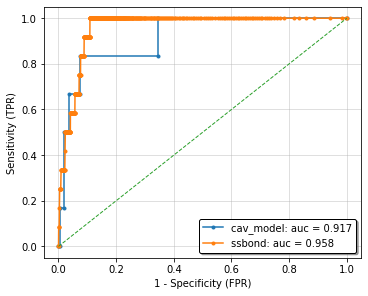

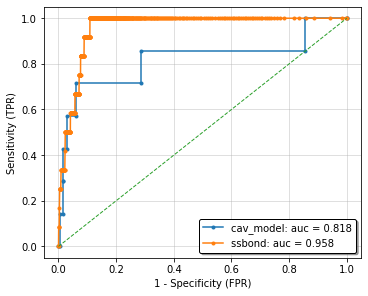

In [ ]:
plot_roc_curve(cav_df_same_dset.ss, cav_df_same_dset.p_ss,
               ssbond_df.ss, ssbond_df.p_ss,
               save_name=f"same_dset_{model_name}")

plot_roc_curve(cav_df.ss, cav_df.p_ss,
               ssbond_df.ss, ssbond_df.p_ss,
               save_name=f"diff_dset_{model_name}")

### Precision-recal curves

In [ ]:
f1_score()
# In terms of model selection,
# F-Measure summarizes model skill for a specific probability threshold (e.g. 0.5),
# whereas the area under curve summarize the skill of a model across thresholds, like ROC AUC.

In pattern recognition, information retrieval and classification (machine learning), precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances, while recall (also known as sensitivity) is the fraction of relevant instances that were retrieved.

Precision = PPV = positive predictive value

In [ ]:
def plot_pr_curve(cav_ss, cav_pss,
                   ssbond_ss, ssbond_pss,
                   save_name="",
    ):
    cav_precision, cav_recall, _ = precision_recall_curve(cav_ss,
                                                          cav_pss, )
    cav_auc = auc(cav_recall, cav_precision)

    ssbond_precision, ssbond_recall, _ = precision_recall_curve(ssbond_ss,
                                                                ssbond_pss, )
    ssbond_auc = auc(ssbond_recall, ssbond_precision)

    # plot the PR curve for the model
    plt.figure(figsize=(5, 4), constrained_layout=True)


    plt.plot(cav_recall, cav_precision, marker='.',
            label=f'cav_model: auc = {cav_auc:5.4f}')
    plt.plot(ssbond_recall, ssbond_precision, marker='.',
            label=f'ssbond: auc = {ssbond_auc:5.4f}')

    plt.axhline(y=sum(cav_ss == 1)/len(cav_ss),
                linestyle='--',
                linewidth=1)

    legend = plt.legend(shadow=True)
    frame = legend.get_frame()
    frame.set_facecolor('white')
    frame.set_edgecolor('black')
    plt.grid(linestyle="-", alpha=0.5)

    plt.xlabel("log( Recall (TPR) )")
    plt.ylabel("log( Precision (PPV) )")

    plt.yscale("log")
    plt.xscale("log")
    plt.savefig(f"results/benchmark/pr_ssbond_cav_{save_name}.png",
                    dpi=200, bbox_inches = "tight")
    plt.show()

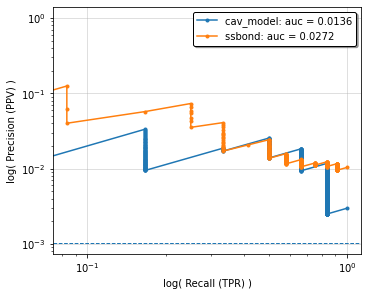

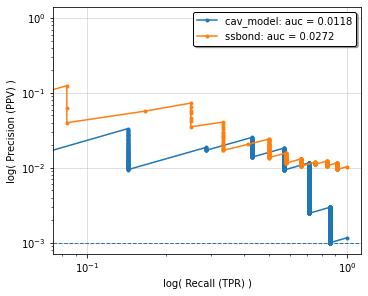

In [ ]:
plot_pr_curve(cav_df_same_dset.ss, cav_df_same_dset.p_ss,
               ssbond_df.ss, ssbond_df.p_ss,
               save_name=f"same_dset_{model_name}")

plot_pr_curve(cav_df.ss, cav_df.p_ss,
               ssbond_df.ss, ssbond_df.p_ss,
               save_name=f"diff_dset_{model_name}")

It is very probable that cys-cys pair is not the most probable one to form.

In [ ]:
# import seaborn as sns
# plt.plot(range(400), preds[mask].squeeze())
# plt.axvline(x=21, color="red", alpha=0.5)

### Confusion matrix

In [ ]:
def plot_confusion_matrix(y_true, probas_pred, threshold,
                          model_name,
                          save_name="model",
                          save=False,
                          cmap="viridis"):

    sns.set(font_scale=1.2, style="ticks")
    cf_matrix = confusion_matrix(y_true, probas_pred > threshold)

    group_names = ["TN","FP","FN","TP"]
    group_counts = [f"{value}" for value in cf_matrix.flatten()]
    row_sums = cf_matrix.sum(axis=1)
    norm_matrix = cf_matrix / row_sums[:, np.newaxis]
    group_percentages = [f"{value*100:.2f}%" for value in norm_matrix.flatten()]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    # Plot heatmap
    sns.heatmap(norm_matrix, annot=labels, annot_kws={"size": 15}, 
                fmt="", vmin=0, vmax=1, cmap=cmap, linewidths=1)
    plt.ylabel("Predicted", fontsize=13)
    plt.xlabel("Predicted", fontsize=13, labelpad=-0)

    plt.title(f"{model_name}, thr: {threshold}", fontsize=15)
    if save:
        plt.savefig(f"results/benchmark/cf_matrix_{save_name}.png",
                dpi=200, bbox_inches = "tight")
    plt.show()

In [ ]:
# cav_fpr, cav_tpr, cav_thresholds = roc_curve(cav_df_same_dset.ss, cav_df_same_dset.p_ss, )
# pd.DataFrame({"fpr": cav_fpr, "tpr": cav_tpr, "cav_thresholds": cav_thresholds,
#               "prop": cav_tpr/cav_fpr})

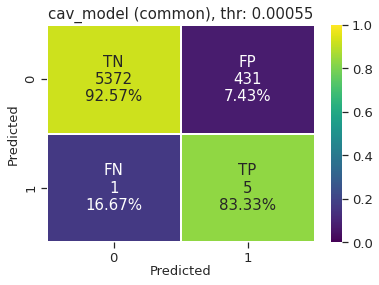

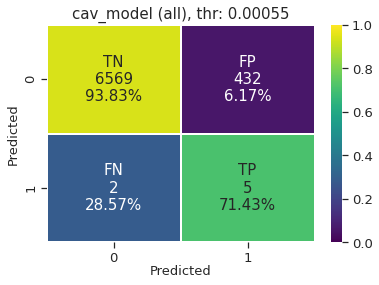

In [ ]:
threshold = 0.00055

plot_confusion_matrix(cav_df_same_dset.ss, cav_df_same_dset.p_ss, threshold,
                      model_name="cav_model (common)", save_name=f"cav_model_same_{model_name}", save=True)

plot_confusion_matrix(cav_df.ss, cav_df.p_ss, threshold,
                      model_name="cav_model (all)", save_name=f"cav_model_all_{model_name}", save=True)

# Estimate stability changes

Goal of this part: create a utility function that computes the stability change of double mutations, with two ways of computing the aa freq (energy folding of the WT).

In [ ]:
import sklearn
from sklearn.metrics import (
    roc_auc_score, roc_curve,
    precision_recall_curve, f1_score, auc,
    confusion_matrix
)

# model_name = "m1_bigger_backbone_b1000_5atoms_matfact_1_lr_2"

ssbonds = pd.read_pickle(f"data/ssbonds/ss_preds_of_{model_name}")
# ssbonds.drop(columns="cav_cys_cys", inplace=True)

cav_df = pd.read_pickle(f"data/ssbonds/preds_of_{model_name}")
cav_df["p_ss"] = cav_df.apply(lambda x: x.preds[21], axis=1)
cav_df["p_wt"] = cav_df.apply(lambda x: x.preds[np.ravel_multi_index([x.res1, x.res2], (20, 20))], axis=1)

cav_df.loc[cav_df["p_ss"] == 0, ["p_ss"]] = 1e-10 # pseudocount to avoid infinite log()

ssbond_df = pd.read_pickle(f"data/ssbonds/preds_of_ssbond")
ssbond_df.p_ss = ssbond_df.p_ss.astype(float)

In [ ]:
# For a fairer comparison, ignore pairs containing PRO and GLY
# from cav model predictions since not included in SSBondPredict ones.
# Remove also "2LZM" predicted pair since it is not included in SSBondPredict analysis.
cav_df_same_dset = cav_df[(~cav_df.res1.isin([12, 5])) & (~cav_df.res2.isin([12, 5]))]
cav_df_same_dset = cav_df_same_dset[~((
    cav_df_same_dset.res1 == 7) & (
        cav_df_same_dset.res2 == 9) & (
            cav_df_same_dset.pdb_id == "2LZM") & (
                cav_df_same_dset.ss == 1))]

## AA freq computed over the whole dataset

In [ ]:
# DRAW a contact map

In [ ]:
# I don't understand the transition matrix

# import seaborn as sns
# pdb_nlfs = np.load("data/pdb_frequencies.npz")
# sns.heatmap(pdb_nlfs["transition_matrix"].T)

In [ ]:
pdb_nlfs = -np.log(np.load("data/pdb_frequencies.npz")["frequencies"])

In [ ]:
to_idx = Bio.PDB.Polypeptide.three_to_index

cav_df["mt_nll"] = -np.log(cav_df["p_ss"])
cav_df["mt_nlf"] = cav_df.apply(
    lambda x: pdb_nlfs[to_idx("CYS")] + pdb_nlfs[to_idx("CYS")], axis=1)

cav_df["wt_nll"] = -np.log(cav_df["p_wt"])
cav_df["wt_nlf"] = cav_df.apply(
    lambda x: pdb_nlfs[x.res1] + pdb_nlfs[x.res2], axis=1)

In [ ]:
cav_df["ddG_cav"] = (cav_df["mt_nll"] - cav_df["mt_nlf"]) - (cav_df["wt_nll"] - cav_df["wt_nlf"])

In [ ]:
cav_df

,pdb_id,res1,res2,preds,ss,p_ss,p_wt,mt_nll,mt_nlf,wt_nll,wt_nlf,ddG_cav
0,1FG9,10,13,"[0.020003015, 0.0026294102, 0.012702644, 0.026...",0,3.036791e-05,0.000644,10.402124,8.67028,7.347818,7.124472,-1.508497
1,1FG9,10,2,"[0.011037171, 0.0029316351, 0.012121082, 0.001...",0,1.138871e-04,0.024230,9.080303,8.67028,3.720164,6.610637,-3.300496
2,1FG9,10,5,"[1.8355177e-06, 1.8403509e-07, 7.865876e-07, 3...",0,6.270597e-12,0.002744,25.795150,8.67028,5.898317,6.346170,-17.572722
3,1FG9,13,2,"[8.065278e-05, 1.2917718e-05, 0.00034276073, 9...",0,8.508214e-07,0.016968,13.977064,8.67028,4.076411,6.163195,-7.393567
4,1FG9,13,12,"[2.6495615e-08, 3.365683e-10, 9.2753165e-09, 1...",0,3.339129e-13,0.070110,28.727896,8.67028,2.657688,6.419070,-23.818998
...,...,...,...,...,...,...,...,...,...,...,...,...
489,9RAT,4,0,"[7.120636e-06, 2.6115723e-07, 3.517133e-08, 2....",0,1.875987e-06,0.084633,13.186376,8.67028,2.469432,5.691920,-7.738584
490,9RAT,2,0,"[0.0038671694, 0.00028054198, 0.0015618677, 0....",0,4.900533e-04,0.024931,7.620996,8.67028,3.691642,5.308662,-0.567736
491,9RAT,0,15,"[0.030611783, 0.0038321938, 0.02256018, 0.0051...",0,3.872267e-03,0.056393,5.553915,8.67028,2.875407,5.328484,0.663288
492,9RAT,0,17,"[0.00012620239, 5.5149383e-05, 0.0018814962, 0...",0,4.058475e-06,0.134117,12.414703,8.67028,2.009041,5.107724,-6.843106


In [ ]:
pd.merge(cav_df[cav_df.ss == 1], ssbonds.drop(["preds", "p_ss"], axis=1), on=["ss", "pdb_id", "res1", "res2"], left_index=True, how="inner")

,pdb_id,res1,res2,preds,ss,p_ss,p_wt,mt_nll,mt_nlf,wt_nll,wt_nlf,ddG_cav,res1_id,res2_id,ssbond_format,pair_nb
34,1FG9,3,15,"[0.0023014196, 6.689683e-05, 0.0018623427, 0.0...",1,6.802026e-06,0.005675,11.898290,8.67028,5.171714,5.557334,3.613630,"[GLU, 7, A]","[SER, 69, A]",GLUA7-SERA69,34
351,1LMB,19,19,"[0.000641133, 8.279148e-05, 0.0008377176, 0.00...",1,9.763336e-05,0.011094,9.234291,8.67028,4.501346,6.623159,2.685825,"[TYR, 82, 3]","[TYR, 174, 4]",TYR388-TYR488,351
182,1RNB,0,15,"[0.012212559, 0.0009610544, 0.029327895, 0.047...",1,1.173682e-03,0.085087,6.747610,8.67028,2.464083,5.328484,0.941730,"[ALA, 41, A]","[SER, 78, A]",ALAA43-SERA80,182
325,1RNB,15,6,"[0.010711929, 0.0017268284, 0.0022854854, 0.01...",1,1.755614e-04,0.006659,8.647522,8.67028,5.011763,6.617214,1.582693,"[SER, 83, A]","[HIS, 100, A]",SERA85-HISA102,325
342,1SNO,5,11,"[2.1529934e-11, 1.4452197e-11, 3.7227021e-10, ...",1,1.650283e-13,0.152660,29.432659,8.67028,1.879545,5.687315,24.570149,"[GLY, 73, A]","[ASN, 112, A]",GLYA79-ASNA118,342
553,1XNB,15,11,"[0.05331456, 0.0006357255, 0.02927645, 0.01944...",1,1.255051e-02,0.014850,4.377994,8.67028,4.209739,5.971604,-2.530422,"[SER, 99, A]","[ASN, 147, A]",SERA100-ASNA148,553
287,2CBA,9,15,"[0.00038303938, 3.9013757e-05, 0.0005640577, 0...",1,7.255226e-05,0.004042,9.531203,8.67028,5.511029,5.277616,0.627509,"[LEU, 57, A]","[SER, 169, A]",LEUA60-SERA173,287
8,2CI2,16,17,"[8.1399376e-05, 9.430951e-05, 0.00035598638, 0...",1,3.008176e-05,0.016684,10.411592,8.67028,4.093295,5.520624,3.168641,"[THR, 3, I]","[VAL, 63, I]",THRI22-VALI82,8
37,2LZM,7,9,"[1.8134122e-05, 1.805348e-06, 6.2309605e-06, 3...",1,1.199891e-06,0.000495,13.633280,8.67028,7.610894,5.287132,2.639237,"[ILE, 8, A]","[LEU, 163, A]",ILEA9-LEUA164,37
99,2RN2,1,11,"[0.0069463956, 0.00023419913, 0.009001989, 0.0...",1,2.201800e-05,0.000388,10.723650,8.67028,7.853572,7.462242,1.662040,"[CYS, 12, A]","[ASN, 43, A]",CYSA13-ASNA44,99


In [ ]:
def _populate_dfs_with_nlls_and_nlfs(
    ddg_data_dict: Dict[str, pd.DataFrame],
    cavity_model_infer_net: CavityModel,
    DEVICE: str,
    BATCH_SIZE: int,
    EPS: float,
):
    """
    
    Helper function to populate ddG dfs with predicted negative-log-likelihoods and negative-log-frequencies
    (in_place modification).
    """

    # Load PDB amino acid frequencies used to approximate unfolded states
    pdb_nlfs = -np.log(np.load("data/pdb_frequencies.npz")["frequencies"])

    # Add predicted Nlls and NLFs to ddG dataframes
    for ddg_data_key in ddg_data_dict.keys():
        df = ddg_data_dict[ddg_data_key]

        # Perform predictions on matched residue environments
        ddg_resenvs = list(df["resenv"].values)
        ddg_resenv_dataset = ResidueEnvironmentsDataset(
            ddg_resenvs, transformer=ToTensor(DEVICE)
        )

        # Define dataloader for resenvs matched to ddG data
        ddg_resenv_dataloader = DataLoader(
            ddg_resenv_dataset,
            batch_size=BATCH_SIZE,
            shuffle=False, # Should be set to True!
            collate_fn=ToTensor(DEVICE).collate_cat,
            drop_last=False, #
        )

        # Infer NLLs
        pred_nlls = []
        for batch_x, _ in ddg_resenv_dataloader:
            batch_pred_nlls = (
                -torch.log(softmax(cavity_model_infer_net(batch_x), dim=-1) + EPS)
                .detach()
                .cpu()
                .numpy()
            )
            pred_nlls.append(batch_pred_nlls)
        pred_nlls_list = [row for row in np.vstack(pred_nlls)]

        # Add NLLs to dataframe
        df["nlls"] = pred_nlls_list

        # Isolate WT and MT NLLs and add to dataframe
        df["wt_nll"] = df.apply(lambda row: row["nlls"][row["wt_idx"]], axis=1) # row is 21-long (21 nll)
        df["mt_nll"] = df.apply(lambda row: row["nlls"][row["mt_idx"]], axis=1) # get nll predicted for WT and MT index

        # Add PDB database statistics negative log frequencies to df
        df["wt_nlf"] = df.apply(lambda row: pdb_nlfs[row["wt_idx"]], axis=1)
        df["mt_nlf"] = df.apply(lambda row: pdb_nlfs[row["mt_idx"]], axis=1)

        # Add ddG prediction (without downstream model) # ds being downstream model
        df["ddg_pred_no_ds"] = df.apply(
            lambda row: row["mt_nll"] - row["mt_nlf"] - row["wt_nll"] + row["wt_nlf"],
            axis=1,
        )

## AA freq computed per protein

# Benchmark with Cavity model

In [ ]:
import pickle
from SSBONDPredict.PreDisulfideBond.SSBOND import process_loadedpdb
from cavity_model import (
    ResidueEnvironmentsDataset,
    ResidueEnvironment,
    )
import glob
import os
import random
from typing import Callable, List, Union

import numpy as np
import pandas as pd
import torch
from torch.utils.data import DataLoader, Dataset

import tqdm.notebook as tqdm
import Bio.PDB
from Bio.PDB.Polypeptide import three_to_index

In [ ]:
def get_candidates_from_ssbond(
    npz_filenames: List[str],
    path_pdbs="/content/gdrive/My Drive/block2_project/cavity_model/cavity_model_demo/data/pdbs/cleaned"
    ):

    dict_filenames_candidates = OrderedDict()
    dict_ssbond_df = OrderedDict()
    for i in tqdm.tnrange(len(npz_filenames)):
        print(f"Prot: {npz_filenames[i]}")

        # Get all pairs from cavity model.
        pdb_id = os.path.basename(npz_filenames[i])[0:4]

        prot = np.load(npz_filenames[i])
        pair_res_indices = prot["pair_res_indices"]
        print(f"Cavity model: {pair_res_indices.shape[0]} pairs")

        # Get all pairs from SSBONDPredict.
        file_ = f"{os.path.basename(npz_filenames[i]).split('_clean')[0]}"
        args = f"{path_pdbs}/{file_}_clean.pdb"
        PositionOfThisProject = "."
        final_dict = process_loadedpdb.process_pdb(args=args,
                        PositionOfThisProject=PositionOfThisProject)

        # Extract ssbonds from SSBONDPredict.
        chain_mapper = {x: idx for x,
                        idx in zip(prot["chain_ids"],
                                    prot["chain_boundary_indices"])}
        ss_pair_aa_onehot = []
        ss_pair_res_indices = []
        likelihoods = []

        for j, key in enumerate(final_dict):
            if float(final_dict[key]) >= 0.5:
                likelihoods.append(float(final_dict[key]))
                res = key.split("-")
                ss_pair_aa_onehot.append(
                    [three_to_index(r[:3]) for r in res]) # will be used to assert
                ss_pair_res_indices.append(
                    [int(r[4:]) + chain_mapper[r[3]] for r in res])

        # ss_pair_res_indices = sorted(ss_pair_res_indices, key=lambda x: x[0]) # DO NOT SORT
        ss_pair_res_indices = np.array(
            [[tuple(x)] for x in ss_pair_res_indices],
            dtype=[('f0', '<i8'), ('f1', '<i8')]
            )
        print(f"SSBONDPredict: {ss_pair_res_indices.shape[0]} / {len(final_dict)} potential ssbonds.")

        # Select only pairs in common with cavity model.
        common_pairs, candidates, ss_candidates = np.intersect1d(
            np.array([[tuple(x)] for x in pair_res_indices],
                        dtype=[('f0', '<i8'), ('f1', '<i8')]),
            ss_pair_res_indices, return_indices=True
            )
        print(f"{candidates.shape[0]} pairs in common.")
        # print("common: ", common_pairs)


        likelihoods = np.array(likelihoods)[ss_candidates]

        dict_filenames_candidates[npz_filenames[i]] = candidates
        dict_ssbond_df[npz_filenames[i]] = pd.DataFrame(
            {"pair": common_pairs,
             "p_ssbond":likelihoods})

    return dict_filenames_candidates, dict_ssbond_df


class ResidueEnvironmentsDatasetForBenchmark(ResidueEnvironmentsDataset):
    """
    Residue environment dataset class

    Parameters
    ----------
    input_data: Union[List[str], List[ResidueEnvironment]]
        List of parsed pdb filenames in .npz format or list of
        ResidueEnvironment objects
    transform: Callable
        A to-tensor transformer class
    """

    def _parse_envs(self, npz_filenames: List[str]) -> List[ResidueEnvironment]:
        """
        TODO: Make this more readable
        """

        res_env_objects = []
        for filename in tqdm.tqdm(npz_filenames,
                                  total=len(npz_filenames),
                                  unit="file",
                                  ):

            candidates = npz_filenames[filename]

            # Get all pairs from cavity model.
            pdb_id = os.path.basename(filename)[0:4]
            prot = np.load(filename)

            # Filter all pairs with selection.
            chain_ids = prot["chain_ids"]
            pair_res_indices = prot["pair_res_indices"][candidates]
            chain_boundary_indices = prot["chain_boundary_indices"]
            atom_coords_prot_seq = prot["positions"][candidates] # atom coords
            restypes_onehots_prot_seq = prot["pair_aa_onehot"][candidates]
            selector_prot_seq = prot["selector"][candidates] # atom ids
            atom_types_flattened = prot["atom_types_numeric"]

            N_pair_residues = selector_prot_seq.shape[0] # WILL BECOME N_PAIRS!!

            for pair_res_i in range(N_pair_residues):
                # Get atom indexes
                selector = selector_prot_seq[pair_res_i]
                selector_masked = selector[selector > -1]  # Remove Filler -1
                
                # Get atom types
                atom_types = atom_types_flattened[selector_masked]
                
                # Get atom coordinates
                coords_mask = (
                    atom_coords_prot_seq[pair_res_i, :, 0] != -99.0 # for all its atoms, only need to check one column of coord for it (x here)
                )  # Remove filler
                coords = atom_coords_prot_seq[pair_res_i][coords_mask]
                
                # Get resi_evt ONE-HOT label (Target variable) -> TO DOUBLE
                restype_onehot = restypes_onehots_prot_seq[pair_res_i]
                
                # Get resi real id -> TO DOUBLE
                pdb_residue_number = pair_res_indices[pair_res_i]
                
                # Locate chain id -> TO DOUBLE
                for j in range(len(chain_ids)):
                    chain_boundary_0 = chain_boundary_indices[j]
                    chain_boundary_1 = chain_boundary_indices[j + 1]
                    if pair_res_i in range(chain_boundary_0, chain_boundary_1):
                        chain_id = str(chain_ids[j])
                        break

                res_env_objects.append(
                    ResidueEnvironment(
                        coords,
                        atom_types,
                        restype_onehot, # -> TO DOUBLE
                        chain_id, # -> TO DOUBLE
                        pdb_residue_number, # -> TO DOUBLE
                        pdb_id,
                    )
                )

        return res_env_objects


In [ ]:
model_name = "m1_bigger_backbone_b1000_5atoms_matfact_1_lr_2" # 4.5
# model_name = "m1_bigger_backbone_b1000_5atoms_matfact_1_lr_2_q_1" # 3.25

MODELS_DIRPATH = "models/double_cav_models"
DEVICE = "cuda"

with open(f"{MODELS_DIRPATH}/{model_name}_metadata.pickle", "rb") as f:
    h = pickle.load(f)

In [ ]:
# Check and set train_val_split.
with open(h["data_path"], "rb") as f_train:
    parsed_pdb_filenames = pickle.load(f_train)
                                       
with open(f"{MODELS_DIRPATH}/metrics_{model_name}.pickle", "rb") as f:
    history = pickle.load(f)

best_epoch = history["best_epoch"]
print("Best epoch:", best_epoch)
print("dataset: ", h["data_path"])
model_state = torch.load(f"{MODELS_DIRPATH}/{model_name}_epoch_{best_epoch}.pt")["model_state_dict"]

Best epoch: 15
dataset:  data/1500_train_set_larger_keep_backbone.pickle


In [ ]:
parsed_pdb_filenames[:2]

['data/pdbs/larger_parsed_keep_backbone/3U62_clean_0_pair_res_features.npz',
 'data/pdbs/larger_parsed_keep_backbone/3U62_clean_1_pair_res_features.npz']

In [ ]:
prot = np.load(parsed_pdb_filenames[0])
for key in prot:
    print(key, prot[key].shape)

atom_types_numeric (4101,)
positions (1236, 161, 3)
selector (1236, 161)
pair_aa_onehot (1236, 400)
chain_boundary_indices (2,)
chain_ids (1,)
pair_res_indices (1236, 2)


In [ ]:
dict_mask, dict_ssbond_df = get_candidates_from_ssbond([parsed_pdb_filenames[0]]) # 95/96

Prot: data/pdbs/larger_parsed_keep_backbone/3U62_clean_0_pair_res_features.npz
Cavity model: 1236 pairs
candidate bonds 810
INFO:tensorflow:Restoring parameters from ./SSBONDPredict/PreDisulfideBond/static/newmodel/model.ckpt-800
finish predict.
SSBONDPredict: 96 / 810 potential ssbonds.
95 pairs in common.



In [ ]:
dict_ssbond_df

OrderedDict([('data/pdbs/larger_parsed_keep_backbone/3U62_clean_0_pair_res_features.npz',
                        pair  p_ssbond
              0      (1, 54)     0.991
              1      (2, 53)     0.527
              2      (3, 56)     0.857
              3      (4, 34)     0.622
              4      (4, 35)     0.702
              ..         ...       ...
              90  (222, 252)     0.548
              91  (226, 248)     0.561
              92  (233, 239)     0.975
              93  (234, 239)     0.842
              94  (240, 243)     0.608
              
              [95 rows x 2 columns])])

In [ ]:
to_tensor_transformer = ToTensor("cuda",
                                 reshape_index=False)

test_dataset = ResidueEnvironmentsDatasetForBenchmark(
    dict_mask,
    transformer=to_tensor_transformer,
    )

test_dataloader = DataLoader(
    test_dataset,
    batch_size=len(test_dataset),
    shuffle=False,
    collate_fn=to_tensor_transformer.collate_cat,
    drop_last=False,
    )

In [ ]:
# Define model
cavity_model_net = h["cav_model"](DEVICE, 
                                  grid_dim_xy=h["grid_dim_xy"],
                                  grid_dim_z=h["grid_dim_z"],
                                  n_atom_types=h["n_atom_types"]).to(DEVICE)

cavity_model_net.load_state_dict(model_state)

loss_function = torch.nn.CrossEntropyLoss(weight=h["weight"])

loss_val, test_res = _test(
    cavity_model_net,
    test_dataloader,
    loss_function,
    h["matfact_k"],
    h["output_shape"])

In [ ]:
labels_true = []
labels_pred = []
loss_batch_list = []

idx_res_split = h["output_shape"] // 2

cavity_model_net.eval()
with torch.set_grad_enabled(False):
    for batch_x, batch_y in tqdm.tqdm(test_dataloader,
                                    total=len(test_dataloader),
                                    unit="batch",
                                    leave=False
                                    ):
        batch_y_pred = cavity_model_net(batch_x)

        # Split predictions in (20, k) x (20, k) for matrix factorization
        batch_y_pred_res1 = batch_y_pred[:, :idx_res_split].reshape(
            -1, 20, h["matfact_k"])
        batch_y_pred_res2 = batch_y_pred[:, idx_res_split:].reshape(
            -1, h["matfact_k"], 20)

        batch_y_pred = (batch_y_pred_res1 @ batch_y_pred_res2).reshape(
            -1, 400)

        loss_batch = loss_function(
            batch_y_pred, torch.argmax(batch_y, dim=1))
        # loss_batch_list.append(loss_batch.detach().cpu().item())

In [ ]:
softmax = torch.nn.Softmax()
softm_batch_y_pred = softmax(batch_y_pred, )

In [ ]:
res_cav = softm_batch_y_pred.to("cpu").numpy()

In [ ]:
1/400

0.0025

In [ ]:
res_cav[:, 21]

array([1.1376820e-02, 2.1907510e-06, 5.0485141e-05, 1.3654389e-04,
       4.9283328e-03, 1.6322465e-05, 5.5318577e-03, 3.5560297e-05,
       6.7321504e-10, 8.8051958e-05, 2.2824861e-04, 9.1365578e-08,
       6.0039724e-07, 2.2700971e-05, 7.2926548e-07, 2.5631122e-03,
       8.8881942e-09, 1.7489256e-06, 6.6031981e-04, 1.7821936e-04,
       9.2722864e-08, 2.0314644e-08, 3.6829672e-04, 1.5264466e-07,
       6.3292726e-05, 1.3384131e-03, 3.7071052e-06, 5.2216003e-04,
       8.0408853e-07, 1.4849805e-07, 1.0825481e-05, 3.8739202e-07,
       4.2369589e-02, 1.6393664e-01, 2.5062609e-06, 4.2836097e-04,
       2.9810361e-04, 9.6668459e-02, 8.2268077e-04, 8.7162953e-05,
       1.5761419e-04, 1.2469476e-03, 1.0434226e-07, 1.4395431e-06,
       1.8850144e-05, 4.5615343e-05, 4.4489698e-03, 6.1744628e-05,
       3.1569567e-07, 2.9110473e-05, 4.5697593e-06, 1.1984528e-08,
       7.8951975e-04, 1.9570065e-07, 8.5717411e-06, 4.2724660e-06,
       5.4185479e-05, 2.2502807e-04, 7.7130151e-04, 3.8283883e

In [ ]:
# get_candidates_from_ssbond([parsed_pdb_filenames[0]]) # 18/96 with 3.25 as pair_radius

Go in test mode to predict ssbonds with cav model
show a dataframe of SSBONDPredict and Cav model predictions
Compute a correlation coefficient (Pearson, Spearman).

Do the predictions for both copies of the pdb. See if the average of the predictions of the two copies is better.

In [ ]:
PositionOfThisProject = "." #"/content/gdrive/My Drive/thesis/"
output_path = "SSBONDPredict/PreDisulfideBond/test_of_ssbondpredict" #"/content/gdrive/My Drive/thesis/SSBONDPredict/PreDisulfideBond/test_of_ssbondpredict"
args = "data/pdbs/cleaned/19HC_clean.pdb"

In [ ]:
# from SSBONDPredict.PreDisulfideBond.SSBOND import process_loadedpdb

final_dict = process_pdb(args=args,
                         PositionOfThisProject=PositionOfThisProject)

canditate bonds 1638
INFO:tensorflow:Restoring parameters from ./SSBONDPredict/PreDisulfideBond/static/newmodel/model.ckpt-800
finish predict.


In [ ]:
# Extract information from the pairs of the preprocessing of the cavity model
prot = np.load(f"data/pdbs/test_parsed/{os.path.basename(args).split('.pdb')[0]}_0_pair_res_features.npz")
# pair_aa_onehot = np.vstack(np.unravel_index(np.argmax(prot["pair_aa_onehot"], axis=1), shape=(20, 20))).T
pair_res_indices = prot["pair_res_indices"]

In [ ]:
# Extract information from the ssbonds from SSBONDPredict
ss_pair_aa_onehot = []
ss_pair_res_indices = []
likelihoods = []

chain_mapper = {x: idx for x, idx in zip(prot["chain_ids"], prot["chain_boundary_indices"])}

for i, key in enumerate(final_dict):
    if float(final_dict[key]) >= 0.5:
        likelihoods.append(float(final_dict[key]))
        res = key.split("-")
        ss_pair_aa_onehot.append([three_to_index(r[:3]) for r in res]) # will be used to assert
        ss_pair_res_indices.append([int(r[4:]) + chain_mapper[r[3]] for r in res])

ss_pair_res_indices = sorted(ss_pair_res_indices, key=lambda x: x[0])
ss_pair_res_indices = np.array([[tuple(x)] for x in ss_pair_res_indices],
                               dtype=[('f0', '<i8'), ('f1', '<i8')])

# Select only pairs in common
_, candidates, ss_candidates = np.intersect1d(np.array([[tuple(x)] for x in pair_res_indices],
                        dtype=[('f0', '<i8'), ('f1', '<i8')]),
               ss_pair_res_indices, assume_unique=True, return_indices=True)

# Check if my preprocessing account for interchain interaction

In [ ]:
from pdb_parser_scripts import (
    extract_pair_environments_v2,
    grid
)

In [ ]:
extract_pair_environments_v2.extract_environments(
    pdb_filename="data/pdbs/cleaned/1A0E_clean.pdb",
    pdb_id="1A0E_clean",
    max_radius=3.25,
    out_dir="data/pdbs/test_parsed",
    max_width_x=4.5,
    max_width_y=4.5,
    max_height=9
)

In [ ]:
(
    features,
    aa_indices,
    chain_ids,
    chain_boundary_indices,
    res_pdb_ids
 ) = extract_atomic_features("data/pdbs/cleaned/1A0E_clean.pdb")

In [ ]:
res_indices_glob = features["res_indices"] # atomic res indices, redundant
res_indices_uniq = np.unique(res_indices_glob)

In [ ]:
max_radius = 4.5

# Extract 2 lists of pairs of residues (each possible order), whose at least
# one of their pairwise heavy atom distance is at most max_radius.
(
    all_pairs_res_indices,
    all_pairs_res_indices_r
    ) = extract_pairs_res(
    features,
    max_radius
    )

In [ ]:
all_pairs_res_indices


array([[  0,   1],
       [  0,   2],
       [  0,   3],
       ...,
       [883, 884],
       [883, 885],
       [884, 885]])

In [ ]:
# Generate the missing pair_res_chain array
pair_res_chain = np.empty(shape=all_pairs_res_indices.shape, dtype="<U1")

lower_bound = 0
for i, upper_bound in enumerate(prot["chain_boundary_indices"][1:]):
    mask = np.logical_and(
                            all_pairs_res_indices >= lower_bound,
                            all_pairs_res_indices < upper_bound
                          )
    pair_res_chain[mask] = prot["chain_ids"][i]

    lower_bound = upper_bound

In [ ]:
mask2 = np.where(pair_res_chain[:, 0] != pair_res_chain[:, 1]) # it fucking works for fixing the actual preprocessing

In [ ]:
np.where(prot["pair_res_indices"] != all_pairs_res_indices)[0] # ok

array([], dtype=int64)

In [ ]:
for key in prot:
    print(key)

atom_types_numeric
positions
selector
pair_aa_onehot
chain_boundary_indices
chain_ids
pair_res_indices


In [ ]:
# Extract relevant local coordinates for each pair_res and relevant info for
# PairResEnvironment object.
for i, all_pairs_res_indices_ in enumerate([all_pairs_res_indices]):

    (
        pair_res_local_xyz_arr,
        atom_types_numeric,
        pair_res_atoms_arr,
        pair_onehot,
        pair_res_pdb_ids
        ) = extract_pair_res_features(
            all_pairs_res_indices_,
            features,
            aa_indices,
            res_pdb_ids,
            max_width_x=4.5,
            max_width_y=4.5,
            max_height=9,
        )

Verdict: I do take into account the interchain interactions, but the way I preprocessed is not properly made... but could be fixed somehow fast (only the 'chain_ids" should be changed, with a shape of (n_pairs, 2). 

I must then:
- redo that small step only with the existing .npz files, and the extract_atomic_features and extract_pair_res OR
- redo the whole preprocessing:
 pass the "chain_ids" argument to extract_pair_res. There, create a new object "pair_res_chains


 - or better!!! just save now the pair_res_pdb_ids as continuous number instead of resetting at each new chain, and that's it!! much easier!!
**all_pairs_res_indices object is already perfect!**

In [ ]:
all_pairs_res_indices[all_pairs_res_indices[:, 0] == 356]

array([[356, 357],
       [356, 358],
       [356, 359],
       [356, 360],
       [356, 867],
       [356, 871]])

In [ ]:
all_pairs_res_indices[all_pairs_res_indices[:, 0] == 356]

array([[356, 357],
       [356, 358],
       [356, 359],
       [356, 360],
       [356, 867],
       [356, 871]])

In [ ]:
all_pairs_res_indices[all_pairs_res_indices[:, 0] == 356]

array([[356, 357],
       [356, 358],
       [356, 359],
       [356, 360],
       [356, 361],
       [356, 362],
       [356, 867],
       [356, 868],
       [356, 870],
       [356, 871],
       [356, 874]])

In [ ]:
871-442

429